# EDA & Insight - The Movies Dataset 

raw dataset source : https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset

# Team Members

- 6610402230 ศิริสุข ทานธรรม หมู่ 1
- 6610401993 ฐาพล ชินกรสกุล หมู่ 1
- 6610402116 ธีร์ อนุสรณ์ศาสน์ หมู่ 1

# EDA - 6610402230 ศิริสุข ทานธรรม

## 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import statistics 
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

## 2. ดูข้อมูลตาราง

In [2]:
path = Path('cleaned')
df_meta = pd.read_csv(path / 'cleaned_6610402230.csv')
df_meta.set_index('id',inplace=True)
df_meta

original_title                                    genres  \
id                                                                    
862             toy story         ['Animation', 'Comedy', 'Family']   
8844              jumanji        ['Adventure', 'Fantasy', 'Family']   
31357   waiting to exhale            ['Comedy', 'Drama', 'Romance']   
949                  heat  ['Action', 'Crime', 'Drama', 'Thriller']   
9091         sudden death       ['Action', 'Adventure', 'Thriller']   
...                   ...                                       ...   
24049              சிவாஜி             ['Action', 'Comedy', 'Drama']   
280422        все и сразу                       ['Crime', 'Comedy']   
62757              dikari                       ['Comedy', 'Drama']   
63281          про любоff                      ['Romance', 'Drama']   
63898            антидурь  ['Action', 'Comedy', 'Crime', 'Foreign']   

            budget      revenue  vote_average  vote_count  
id                                                         
862     30000000.0  373554033.0           7.7      5415.0  
8844    65000000.0  262797249.0           6.9      2413.0  
31357   16000000.0   81452156.0           6.1        34.0  
949     60000000.0  187436818.0           7.7      1886.0  
9091    35000000.0   64350171.0           5.5       174.0  
...            ...          ...           ...         ...  
24049   12000000.0   19000000.0           6.9        25.0  
280422    750000.0          3.0           6.0         4.0  
62757     800000.0    1328612.0           5.8         6.0  
63281    2000000.0    1268793.0           4.0         3.0  
63898    5000000.0    1413000.0           1.0         1.0  

[5358 rows x 6 columns]

## 3. แสดง genres 

In [3]:
df_meta.genres = df_meta.genres.apply(eval)
genres = df_meta.genres.apply(lambda x: x[0]).unique()
genres,genres.shape

(array(['Animation', 'Adventure', 'Comedy', 'Action', 'History', 'Drama',
        'Crime', 'Fantasy', 'Science Fiction', 'Horror', 'Romance',
        'Mystery', 'Thriller', 'Documentary', 'Family', 'War', 'Western',
        'Music', 'TV Movie', 'Foreign'], dtype=object),
 (20,))

## 4. visualize graph ข้อมูลเบื้องต้น

In [4]:
def plot_avg_budget_revenue(df):
    df_exploded = df.explode('genres')
    
    genre_stats = df_exploded.groupby('genres').agg({
        'budget': 'mean',
        'revenue': 'mean'
    }).reset_index()

    # Create a bar plot
    plt.figure(figsize=(10, 4))
    x = np.arange(len(genre_stats))
    width = 0.35

    plt.bar(x - width/2, genre_stats['budget'], width, label='Budget', color='skyblue')
    plt.bar(x + width/2, genre_stats['revenue'], width, label='Revenue', color='lightgreen')

    plt.xlabel('Genres')
    plt.ylabel('Amount ($)')
    plt.title('Average Budget vs Revenue by Genre')
    plt.xticks(x, genre_stats['genres'], rotation=45, ha='right')
    plt.legend()

    # Format y-axis to millions
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}M' if x >= 1e6 else f'${x:,.0f}'))

    plt.tight_layout()
    plt.show()


In [5]:
def plot_avg_vote_by_genre(x):
    df_exploded = x.explode('genres')

    genre_stats = df_exploded.groupby('genres').agg({
        'vote_average': 'mean'
    }).reset_index()

    # Create a bar plot
    plt.figure(figsize=(10, 4))
    x = np.arange(len(genre_stats))
    width = 0.35

    plt.bar(x, genre_stats['vote_average'], width, color='skyblue')

    plt.xlabel('Genres')
    plt.ylabel('Average Vote Rating')
    plt.title('Average Vote Rating by Genre')
    plt.xticks(x, genre_stats['genres'], rotation=45, ha='right')

    for i, v in enumerate(genre_stats['vote_average']):
        plt.text(i, v, f'{v:.1f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

### 4.1 ผลลัพธ์
- แสดงผล กราฟ budget, revenue ของแต่ละ genre
- แสดงผล กราฟ average vote (rating)ของแต่ละ genre

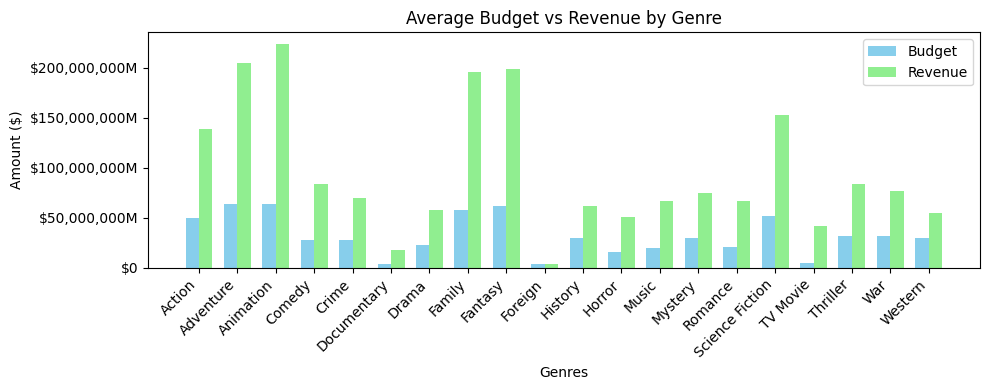

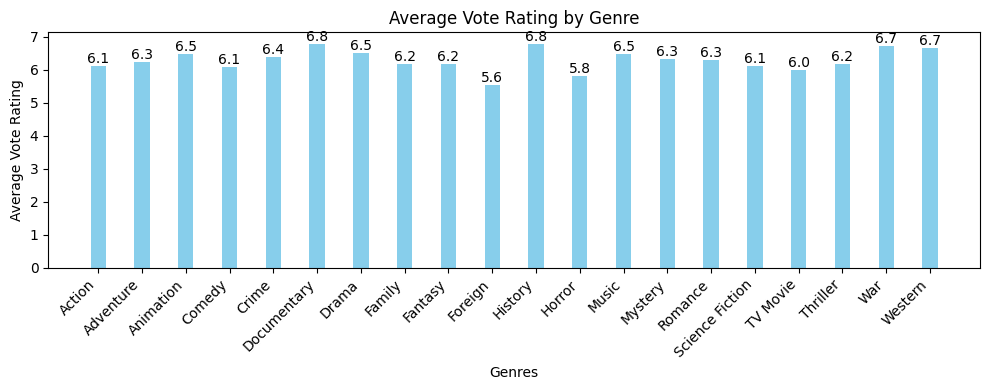

In [6]:
plot_avg_budget_revenue(df_meta)
plot_avg_vote_by_genre(df_meta)

### 4.2 การหาค่ากลาง

In [7]:
mean_revenue = df_meta['revenue'].mean()
mean_budget = df_meta['budget'].mean()
mean_vote = df_meta['vote_average'].mean()

print(f"Average Revenue: ${mean_revenue:,.2f}")
print(f"Average Budget:  ${mean_budget:,.2f}")
print(f"Average Vote:    {mean_vote:.2f}")

Average Revenue: $90,645,073.73
Average Budget:  $31,192,402.89
Average Vote:    6.28


## 5. แสดงกราฟ distribution

### 5.1 revenue distribution

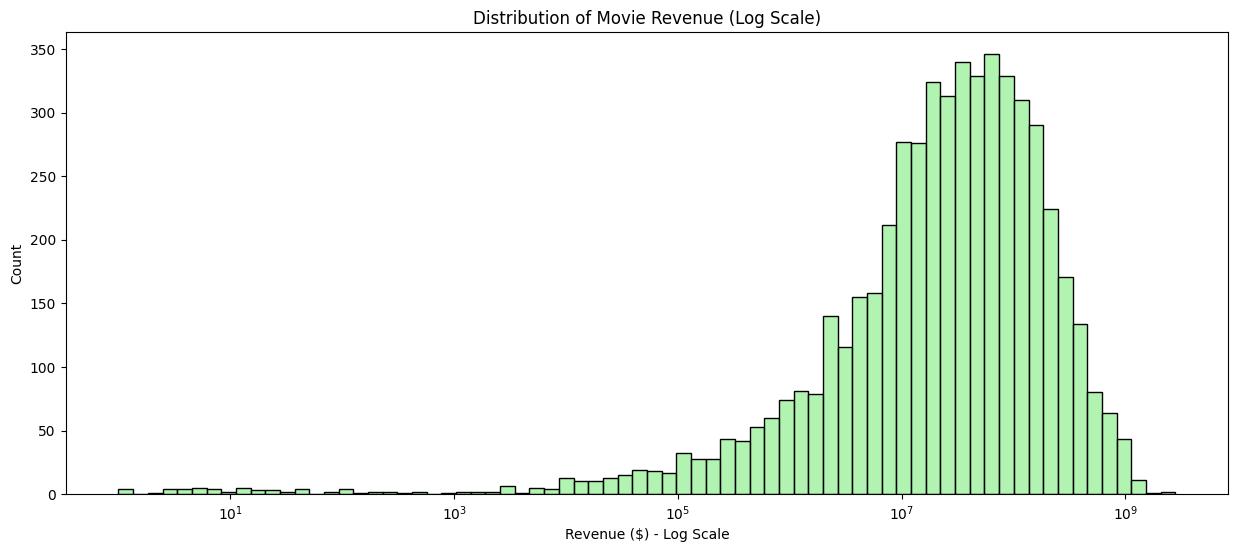

In [8]:
plt.figure(figsize=(15,6))
sns.histplot(data=df_meta, x='revenue', log_scale=True, color='lightgreen', alpha=0.7)
plt.title('Distribution of Movie Revenue (Log Scale)')
plt.xlabel('Revenue ($) - Log Scale')
plt.ylabel('Count')
plt.show()


### 5.2 budget distribution

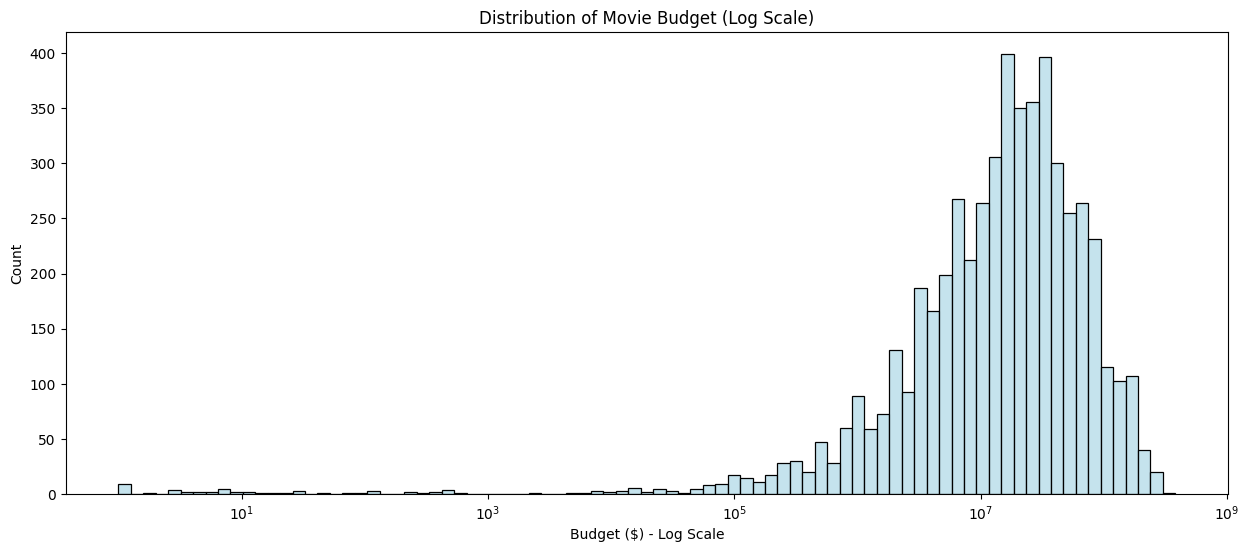

In [9]:
plt.figure(figsize=(15,6))
sns.histplot(data=df_meta, x='budget', log_scale=True, color='lightblue', alpha=0.7)
plt.title('Distribution of Movie Budget (Log Scale)')
plt.xlabel('Budget ($) - Log Scale')
plt.ylabel('Count')
plt.show()


### 5.1 vote_average(rating) distribution

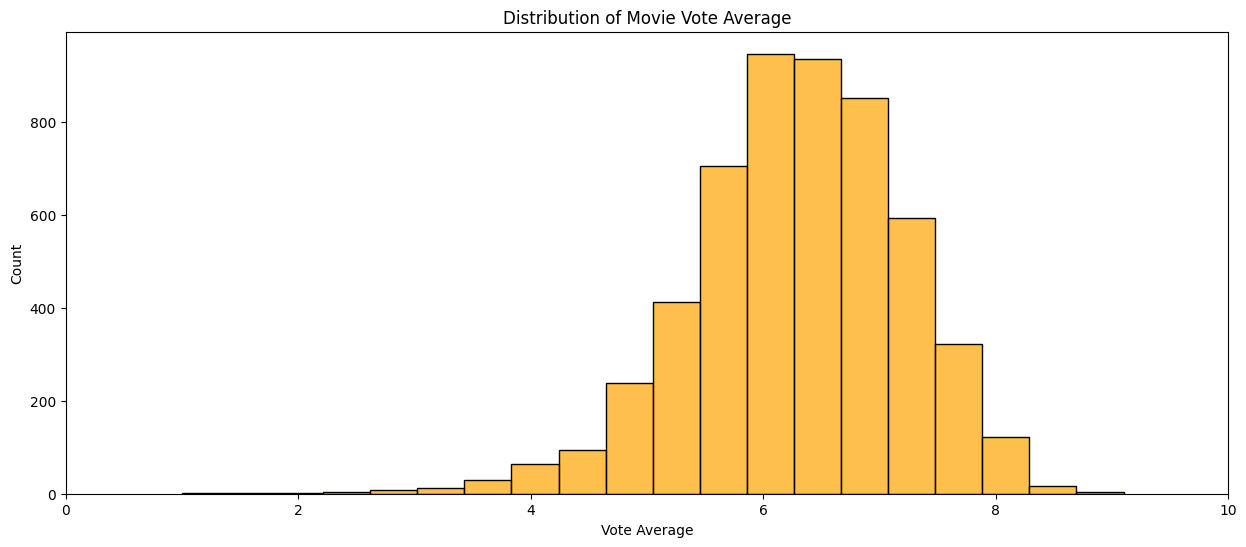

In [10]:
plt.figure(figsize=(15, 6))
sns.histplot(x=df_meta['vote_average'],bins=20,color='orange',alpha=0.7)
plt.xlim(0, 10)  
plt.title('Distribution of Movie Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Count')
plt.show()

## 6.Central Limit Theorem Visualization

### 6.1 sample with n_bootstraps

In [11]:
n_bootstraps = 1000  
sample_size = 500    
budget_means = []
revenue_means = []
vote_averages_means = []

for i in range(n_bootstraps):
    sample = df_meta.sample(n=sample_size, replace=True)
    sample_means_budget = sample.explode('genres').groupby('genres')['budget'].mean()
    sample_means_revenue = sample.explode('genres').groupby('genres')['revenue'].mean()
    sample_means_vote_avg = sample.explode('genres').groupby('genres')['vote_average'].mean()
    budget_means.append(sample_means_budget)
    revenue_means.append(sample_means_revenue)
    vote_averages_means.append(sample_means_vote_avg)

budget_means_df = pd.DataFrame(budget_means)
revenue_means_df = pd.DataFrame(revenue_means)
vote_averages_means_df = pd.DataFrame(vote_averages_means)

### 6.2 fill zero values

In [12]:
budget_means_df.fillna(0,inplace=True)
revenue_means_df.fillna(0,inplace=True)
vote_averages_means_df.fillna(0,inplace=True)

In [13]:
def plot_samples_genre_mean(df_meta,budget_means_df, revenue_means_df):
    n_genres = len(budget_means_df.columns)
    n_plots = (n_genres + 9) // 10  # Round up to nearest multiple of 10
    
    actual_means = df_meta.explode('genres').groupby('genres').agg({
        'budget': 'mean',
        'revenue': 'mean'
    })
    
    for i in range(n_plots):
        start_idx = i * 10
        end_idx = min(start_idx + 10, n_genres)
        
        fig, axes = plt.subplots(1, end_idx - start_idx, figsize=(40, 5))
        if end_idx - start_idx == 1:
            axes = [axes]  # Make axes iterable when only one subplot
            
        for idx, genre in enumerate(budget_means_df.columns[start_idx:end_idx]):
            # Budget histogram
            axes[idx].hist(budget_means_df[genre].dropna(), bins=30, density=True, alpha=0.5, color='skyblue', label='Sample Budget Distribution')
            axes[idx].axvline(actual_means.loc[genre, 'budget'], color='blue', linestyle='--', label='Actual Budget Mean')
            # Revenue histogram
            axes[idx].hist(revenue_means_df[genre].dropna(), bins=30, density=True, alpha=0.5, color='lightgreen', label='Sample Revenue Distribution')
            axes[idx].axvline(actual_means.loc[genre, 'revenue'], color='green', linestyle='--', label='Actual Revenue Mean')
            
            axes[idx].set_title(f'{genre}\nSample Mean Budget=${budget_means_df[genre].mean():,.0f}\n'
                               f'Sample Mean Revenue=${revenue_means_df[genre].mean():,.0f}\n'
                               f'Actual Mean Budget=${actual_means.loc[genre,"budget"]:,.0f}\n'
                               f'Actual Mean Revenue=${actual_means.loc[genre,"revenue"]:,.0f}')
            axes[idx].set_xlabel('Amount ($)')
            axes[idx].set_ylabel('Density')
            axes[idx].legend()
        
        plt.tight_layout()
        plt.show()
 

In [14]:
def plot_samples_genre_mean_vote(df_meta, vote_averages_means_df):
    n_genres = len(vote_averages_means_df.columns)
    n_plots = (n_genres + 9) // 10  # Round up to nearest multiple of 5
    
    actual_means = df_meta.explode('genres').groupby('genres').agg({
        'vote_average': 'mean'
    })
    
    for i in range(n_plots):
        start_idx = i * 10
        end_idx = min(start_idx + 10, n_genres)
        
        fig, axes = plt.subplots(1, end_idx - start_idx, figsize=(40, 5))
        if end_idx - start_idx == 1:
            axes = [axes]  # Make axes iterable when only one subplot
            
        for idx, genre in enumerate(vote_averages_means_df.columns[start_idx:end_idx]):
            # Vote average histogram
            axes[idx].hist(vote_averages_means_df[genre].dropna(), bins=30, density=True, alpha=0.5, color='lightpink', label='Sample Vote Average Distribution')
            axes[idx].axvline(actual_means.loc[genre, 'vote_average'], color='red', linestyle='--', label='Actual Vote Average Mean')
            
            axes[idx].set_title(f'{genre}\nSample Mean Vote={vote_averages_means_df[genre].mean():.1f}\n'
                               f'Actual Mean Vote={actual_means.loc[genre,"vote_average"]:.1f}')
            axes[idx].set_xlabel('Vote Score')
            axes[idx].set_ylabel('Density')
            axes[idx].legend()
        
        plt.tight_layout()
        plt.show()

### 6.3 plot mean ของ sample budget revenue และ vote จาก sample กับค่าจริง

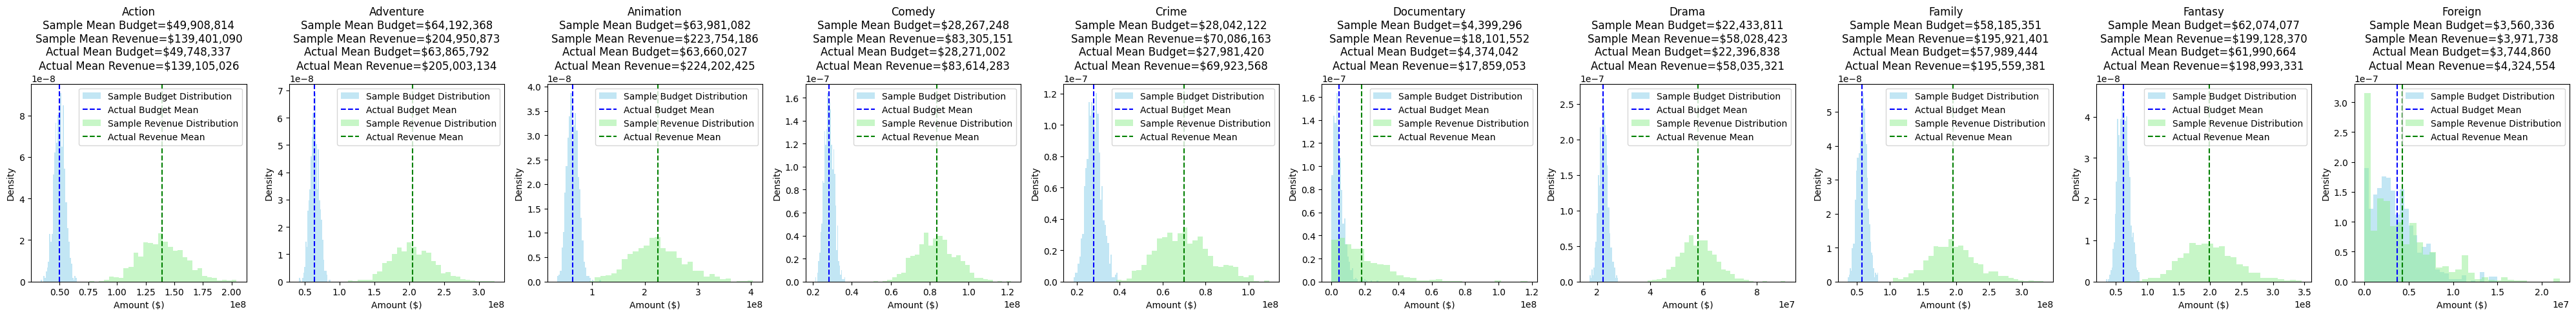

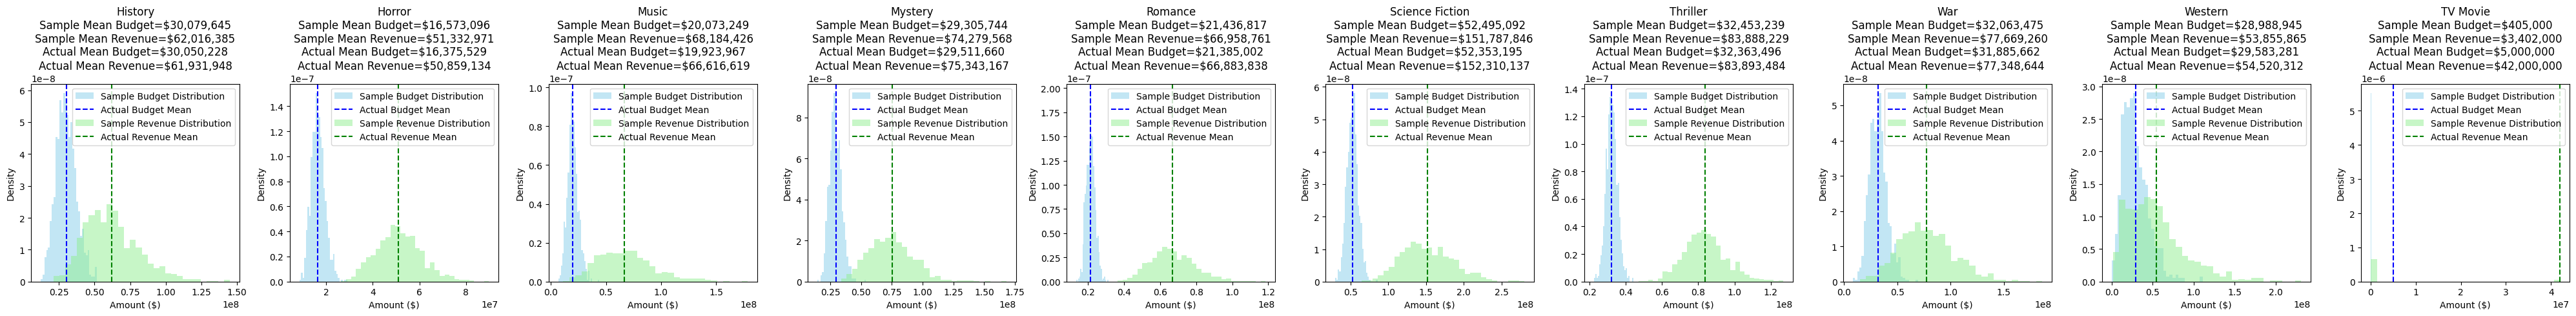

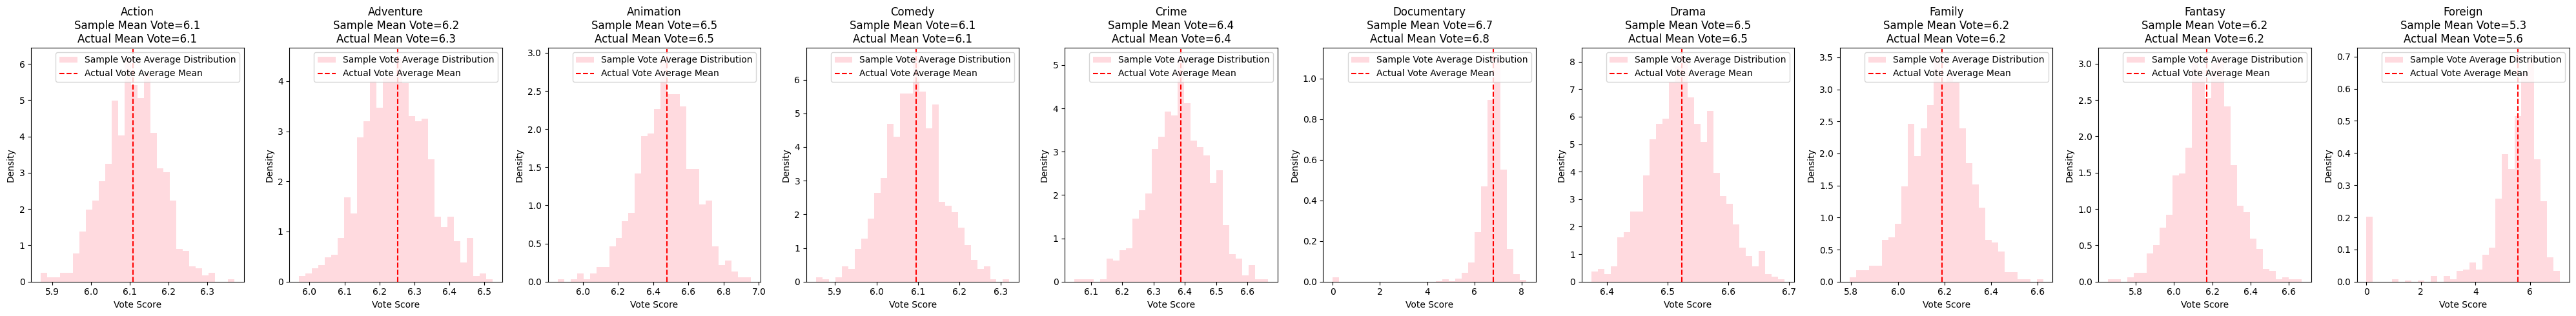

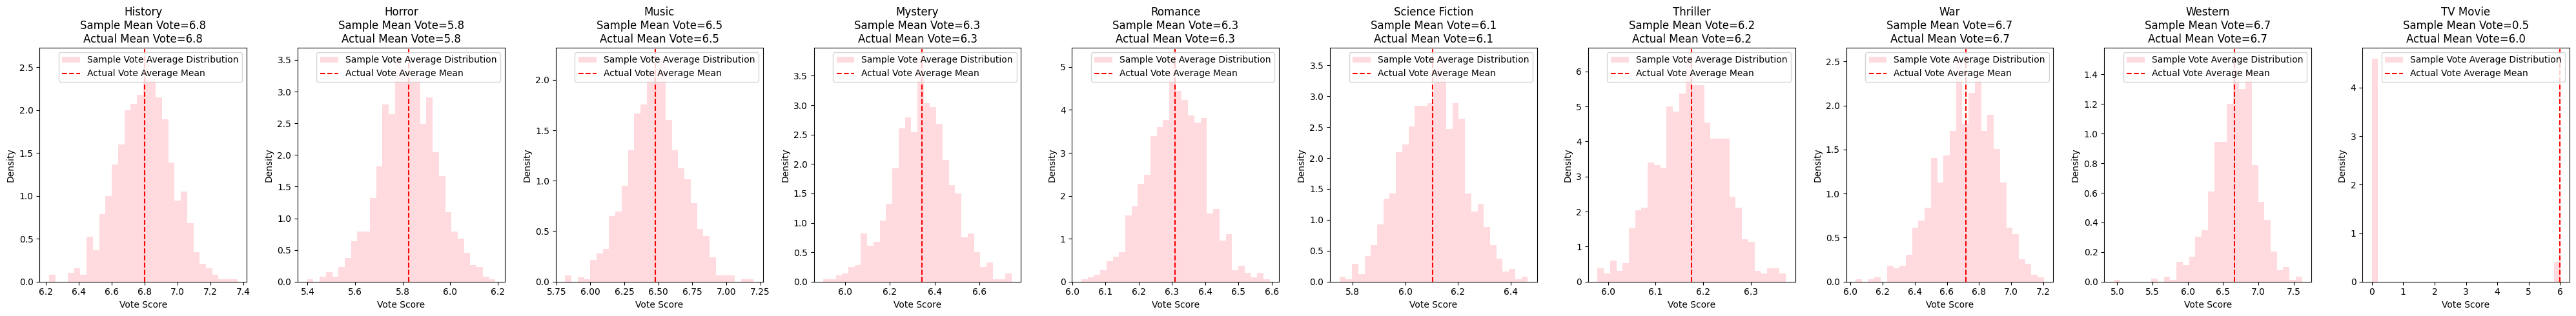

In [15]:
plot_samples_genre_mean(df_meta,budget_means_df,revenue_means_df)
plot_samples_genre_mean_vote(df_meta, vote_averages_means_df)

## 7. การหา correlation ของข้อมูล

### 7.1 ฮยากรู้ว่าข้อมูลต่อไปนี้มีความสัมพันธ์กันมั้ย
- budget
- revenue
- vote_average(rating)


In [16]:

from scipy import stats

cols = ['budget', 'revenue', 'vote_average']
df_sub = df_meta[cols]

corr_matrix = df_sub.corr()
print("Correlation matrix:")
print(corr_matrix)

# To Calculate Pearson and p-value for each pair of variable
print("\nDetailed correlation analysis with p-values:")
for i, col1 in enumerate(cols):
    for col2 in cols[i+1:]:
        r, p = stats.pearsonr(df_sub[col1], df_sub[col2])
        print(f"{col1} vs {col2}: r = {r:.2f}, p-value = {p:.3g}")

Correlation matrix:
                budget   revenue  vote_average
budget        1.000000  0.730104     -0.011925
revenue       0.730104  1.000000      0.167952
vote_average -0.011925  0.167952      1.000000

Detailed correlation analysis with p-values:
budget vs revenue: r = 0.73, p-value = 0
budget vs vote_average: r = -0.01, p-value = 0.383
revenue vs vote_average: r = 0.17, p-value = 3.4e-35


### 7.2 revenue confidence interval ของ dataset

In [17]:
# Standard Error s/n**1/2
SE = df_sub.revenue.std() / len(df_sub.revenue)**(1/2)

# Confidence Interval (95%)
confidence_level = 0.95
degrees_of_freedom = len(df_sub.revenue) - 1
t_value = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom)

margin_of_error = t_value * SE # 1.96 * Standard Error
print(f"t-value: {t_value:.2f}, SE: {SE:.2f}, Margin of Error: {margin_of_error:.2f}")
confidence_interval = (df_sub.revenue.mean() - margin_of_error, 
                      df_sub.revenue.mean() + margin_of_error)

print(f"95% Confidence Interval: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")

t-value: 1.96, SE: 2273456.74, Margin of Error: 4456900.33
95% Confidence Interval: (86188173.40, 95101974.05)


### 7.3 การหา correlation ของแต่ละ genre

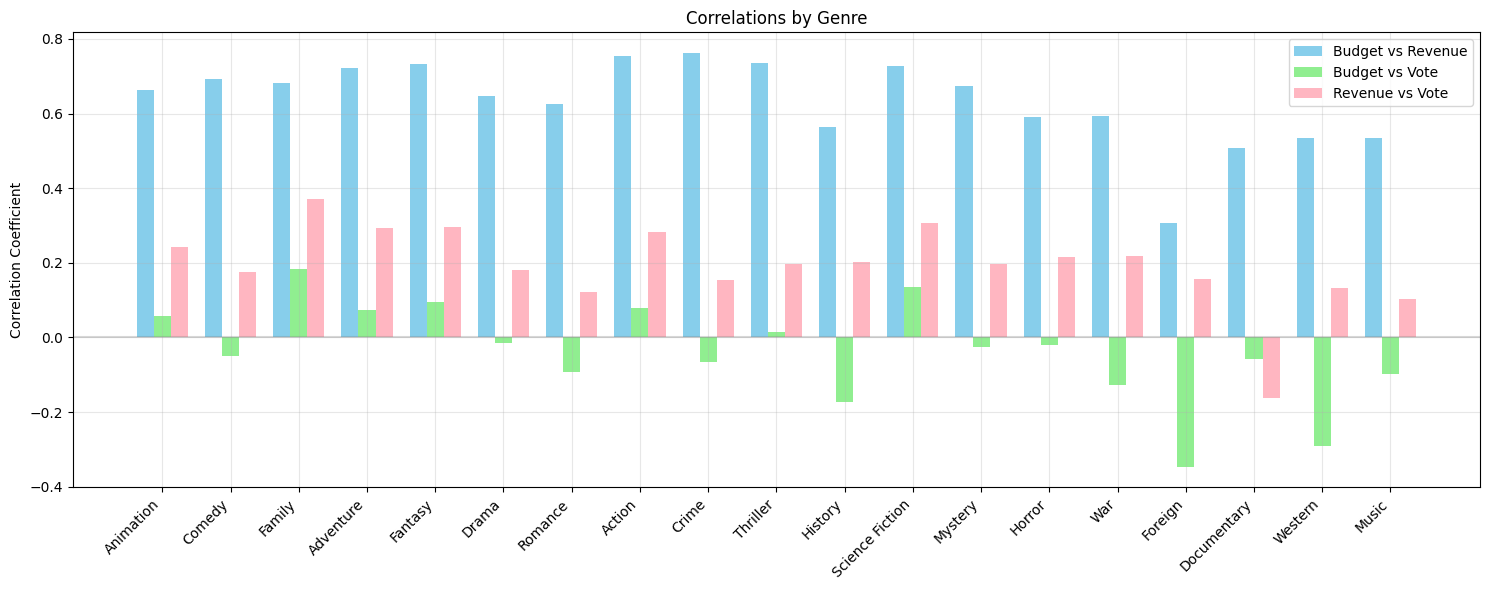

In [18]:
df_exploded = df_meta.explode('genres')
genres = df_exploded['genres'].unique()

budget_revenue_corr = []
budget_vote_corr = []
revenue_vote_corr = []
genre_names = []

for genre in genres:
    genre_data = df_exploded[df_exploded['genres'] == genre][['budget', 'revenue', 'vote_average']]
    
    if len(genre_data) > 2:
        corr_matrix = genre_data.corr()
        budget_revenue_corr.append(corr_matrix.loc['budget', 'revenue'])
        budget_vote_corr.append(corr_matrix.loc['budget', 'vote_average'])
        revenue_vote_corr.append(corr_matrix.loc['revenue', 'vote_average'])
        genre_names.append(genre)

fig, ax = plt.subplots(figsize=(15, 6))

width = 0.25
x = np.arange(len(genre_names))

ax.bar(x - width, budget_revenue_corr, width, label='Budget vs Revenue', color='skyblue')
ax.bar(x, budget_vote_corr, width, label='Budget vs Vote', color='lightgreen')
ax.bar(x + width, revenue_vote_corr, width, label='Revenue vs Vote', color='lightpink')

ax.set_ylabel('Correlation Coefficient')
ax.set_title('Correlations by Genre')
ax.set_xticks(x)
ax.set_xticklabels(genre_names, rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3)

# Add horizontal line at y=0
ax.axhline(y=0, color='gray', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

## 8.การทำ Hypothesis Testing

### 8.1 ประเด็นคำถาม
- คำถาม (สมมุติฐาน) คือ vote_average และ budget ที่เพิ่มขึ้นมีผลทำให้ revenue สูงขึ้น
- H0 เป็นความบังเอิญ
- H1 เป็นความจริง
- alpha = 0.0001

In [19]:
import statsmodels.api as sm
df_sub = df_sub[(df_sub['budget'] > 0) & (df_sub['revenue'] > 0)]

# log-scale reduce skew of data
df_sub['log_budget'] = np.log(df_sub['budget'])
df_sub['log_revenue'] = np.log(df_sub['revenue'])

X = df_sub[['log_budget', 'vote_average']]  # indepentdent variable
X = sm.add_constant(X)  # add constant
y = df_sub['log_revenue'] # dependent variable
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            log_revenue   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     2974.
Date:                Sun, 30 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:28:51   Log-Likelihood:                -10716.
No. Observations:                5358   AIC:                         2.144e+04
Df Residuals:                    5355   BIC:                         2.146e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0717      0.265     -4.038   

* Prob (F-statistic): 0.00 
   - P-Value extremely small (< 0.000001)
* coefficent of log_budget: 0.8905  
* coefficent of vote_average 0.5308 

### 8.2 วิเคราะห์ผล hypothesis testing

NOTE : log-scale ช่วยในการตีความสัมประสิทธิ์เป็นแบบเปลี่ยนแปลงในอัตราส่วนหรือเปอร์เซ็นต์ ซึ่งเป็นวิธีที่นิยมใช้เมื่อข้อมูลมีการกระจายที่เอียง (skewed) และมีค่า outliers สูงขึ้นในบางกรณี


* จากผลการทดสอบสมมุติญาน P-Value < < 0.000001 น้อยกว่า alpha 0.0001 บอกได้ว่า 
  - reject H0
  - accept H1
  - ยอมรอบสมมุติฐานที่ว่า budget และ vote_average เพิ่มขึ้นทำให้ค่า revene เพิ่มขึ้น


* จากผล coefficent of log_budget: 0.8905  
  - เมื่อ log_budget เพิ่มขึ้นหนึ่งหน่วยทำให้ค่า revenue เพิ่มขึ้น 0.8905  
* จากผล coefficent of vote_average: 0.5308   
  - เมื่อ vote_average เพิ่มขึ้นหนึ่งหน่วยทำให้ค่า revenue เพิ่มขึ้น 0.5308  

## สรุปผล Insight

จากการวิเคราห์ correlation จากข้อมูล budget vote_average revenue พบว่า budget และ vote_average มีความสัมพันธืเป็นเส้นตรงไปทางบวกกับข้อมูล revenue โดยเฉพาะจากการ วิเคราะห์เจาะลึกไปที่ genre ทำให้ทราบว่ามี correlation ที่สูงกว่าในระดับข้อมูลรวม และจากการทำ hypothesis testing ยอมรอบสมมุติฐานที่ว่า budget vote_average มีผลกับกับ revenue ไปทางบวกเพราะ P-Value น้อยกว่าค่า alpha และมีค่าการเปลี่ยนแปลงที่ budget หรือ vote_average เพิ่มขึ้น 1 หน่วยทำให้ revenue เพิ่มขึ้น 0.8905 และ 0.5308 ตามลำดับ

# EDA&INSIGHT - 6610401993 ฐาพล ชินกรสกุล

## 1. Import สิ่งที่จำเป็น

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import chi2
from wordcloud import WordCloud
from sklearn.utils import shuffle
import seaborn as sns

## 2. ตั้งค่าการทดลอง

### 2.1 ตั้ง seed เพื่อให้การทดลอง reproducible

In [21]:
np.random.seed(42)
random_state = 42

### 2.2 ตั้งค่านัยสำคัญไว้ก่อนที่จะทดลอง

In [22]:
ALPHA = 0.05

## 3. โหลดชุดข้อมูลเป้าหมาย

In [23]:
df_insight = pd.read_pickle("cleaned/cleaned_6610401993.pkl")

In [24]:
df_insight.columns

Index(['adult', 'budget', 'genres', 'homepage', 'id', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'video', 'vote_average', 'vote_count', 'movie_id',
       'collection_name', 'movies_before', 'collection_count',
       'main_cast_gender', 'main_cast_character', 'main_cast_name',
       'movie_after', 'roi', 'keywords', 'vote_after',
       'next_main_cast_gender_same', 'next_main_cast_actor_name_same',
       'next_main_cast_same', 'vote_increase'],
      dtype='object')

## 4. กรองข้อมูล เลือกข้อมูล และสร้าง Feature เพื่อการวิเคราะห์

### 4.1 กรองข้อมูลให้เหลือเฉพาะที่เกี่ยวข้อง
- ลบข้อมูลหนังที่ไม่มีภาคต่อ (เราวิเคราะห์เฉพาะที่มีภาคต่อ)
- จำกัดสูงสุด 5 เรื่องต่อ collection (เพื่อไม่ให้เกิดการซ้ำซ้อนของ keyword ที่จะทำให้การวิเคราะห์ผิดพลาด)
- ลบค่าสุดโต่ง
- ลบ row ที่มีค่าที่สนใจได้แก่ "vote_increase", "vote_after" (เราไม่สามารถวิเคราะห์อันที่ไม่มีได้)
- ลบ keyword ที่แม้พบบ่อยแต่ก็ไม่มีความหมาย ได้แก่ 'sequel', 'duringcreditsstinger', 'aftercreditsstinger'

In [25]:
df_insight = df_insight[df_insight["movie_after"]!=0.0]
df_insight = df_insight.groupby("collection_name").head(5)
df_insight = df_insight.replace([np.inf, -np.inf], np.nan)
df_insight = df_insight.dropna(subset=["vote_increase", "vote_after"])
df_insight.shape

(2459, 38)

In [26]:
all_keywords = []
for keywords in df_insight['keywords'].dropna():
    all_keywords.extend(keywords)
unique_keywords = list(set(all_keywords))

if 'sequel' in unique_keywords:
    unique_keywords.remove('sequel')
if 'duringcreditsstinger' in unique_keywords:
    unique_keywords.remove('duringcreditsstinger')
if 'aftercreditsstinger' in unique_keywords:
    unique_keywords.remove('aftercreditsstinger')

def keyword_to_onehot(keywords_list, unique_keywords):
    if isinstance(keywords_list, list):
        return {f"keyword_{keyword}": 1 if keyword in keywords_list else 0 for keyword in unique_keywords}
    else:
        return {f"keyword_{keyword}": 0 for keyword in unique_keywords}

keyword_dummies = df_insight['keywords'].apply(
    lambda x: keyword_to_onehot(x, unique_keywords)
)

keyword_df = pd.DataFrame(keyword_dummies.tolist(), index=df_insight.index)

df_insight = pd.concat([df_insight, keyword_df], axis=1)

### 4.2 สกัดเฉพาะ Column ที่สนใจ

In [27]:
interested = df_insight.drop(["movie_id","vote_after","roi","genres","keywords"],axis=1)

## 5. สำรวจความสัมพันธ์ในข้อมูล

### 5.1 วิเคราะห์ความสัมพันธ์ระหว่างภาพยนตร์ที่มีตัวละครเหมือนกันกับที่ไม่เหมือนกัน

#### 5.1.1 แสดง Visualization ของความสัมพันธ์ระหว่างภาพยนตร์ที่มีตัวละครเหมือนกันกับที่ไม่เหมือนกัน

-0.018979878583000626
-0.0461138858560842


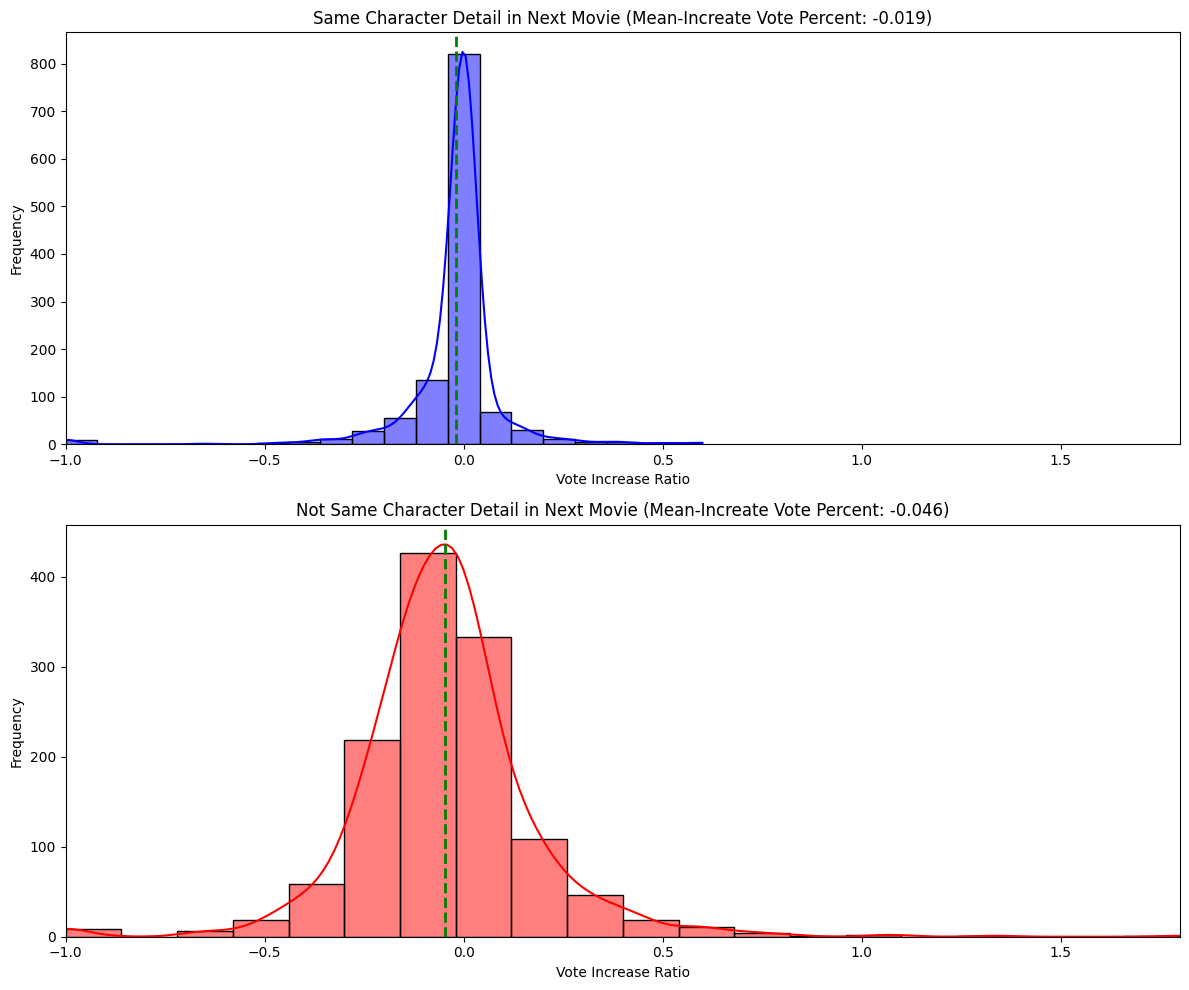

In [28]:
ptr = df_insight[df_insight[["next_main_cast_gender_same","next_main_cast_actor_name_same","next_main_cast_same"]].sum(axis=1)==3]["vote_increase"]
print(ptr.mean())
# Find global min and max for consistent x-axis limits
min_val = df_insight['vote_increase'].min()
max_val = df_insight['vote_increase'].max()

fig, axes = plt.subplots(2, 1, figsize=(12,10))

sns.histplot(data=ptr, kde=True, ax=axes[0], bins=20, color='blue')
axes[0].axvline(ptr.mean(), color='green', linestyle='--', linewidth=2)
axes[0].set_title(f'Same Character Detail in Next Movie (Mean-Increate Vote Percent: {ptr.mean():.3f})')
axes[0].set_xlabel('Vote Increase Ratio')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(min_val, max_val)


ptr = df_insight[df_insight[["next_main_cast_gender_same","next_main_cast_actor_name_same","next_main_cast_same"]].sum(axis=1)!=3]["vote_increase"]
print(ptr.mean())
sns.histplot(data=ptr, kde=True, ax=axes[1], bins=20, color='red')
axes[1].axvline(ptr.mean(), color='green', linestyle='--', linewidth=2)
axes[1].set_title(f'Not Same Character Detail in Next Movie (Mean-Increate Vote Percent: {ptr.mean():.3f})')
axes[1].set_xlabel('Vote Increase Ratio')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(min_val, max_val)

plt.tight_layout()
plt.show()

#### 5.1.2 แสดงตารางของความสัมพันธ์ระหว่างภาพยนตร์ที่มีตัวละครเหมือนกันกับที่ไม่เหมือนกัน

In [29]:
# Create a table to show the differences between same and different character details
comparison_data = {
    'Category': ['Same Character Details', 'Different Character Details'],
    'Mean Vote Increase': [
        df_insight[df_insight[["next_main_cast_gender_same","next_main_cast_actor_name_same","next_main_cast_same"]].sum(axis=1)==3]["vote_increase"].mean(),
        df_insight[df_insight[["next_main_cast_gender_same","next_main_cast_actor_name_same","next_main_cast_same"]].sum(axis=1)!=3]["vote_increase"].mean()
    ],
    'Sample Size': [
        df_insight[df_insight[["next_main_cast_gender_same","next_main_cast_actor_name_same","next_main_cast_same"]].sum(axis=1)==3].shape[0],
        df_insight[df_insight[["next_main_cast_gender_same","next_main_cast_actor_name_same","next_main_cast_same"]].sum(axis=1)!=3].shape[0]
    ]
}

# Convert to DataFrame for better display
comparison_df = pd.DataFrame(comparison_data)
display(comparison_df)

Category  Mean Vote Increase  Sample Size
0       Same Character Details           -0.018980         1194
1  Different Character Details           -0.046114         1265

#### 5.1.3 แสดง visualization ค่าที่แตกต่างของความสัมพันธ์ระหว่างภาพยนตร์ที่มีตัวละครเหมือนกันกับที่ไม่เหมือนกัน

C:\Users\sunmodza\AppData\Local\Temp\ipykernel_1760\2813527112.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Category', y='Mean Vote Increase', data=comparison_df, palette=['blue', 'red'])
c:\Users\sunmodza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\sunmodza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_su

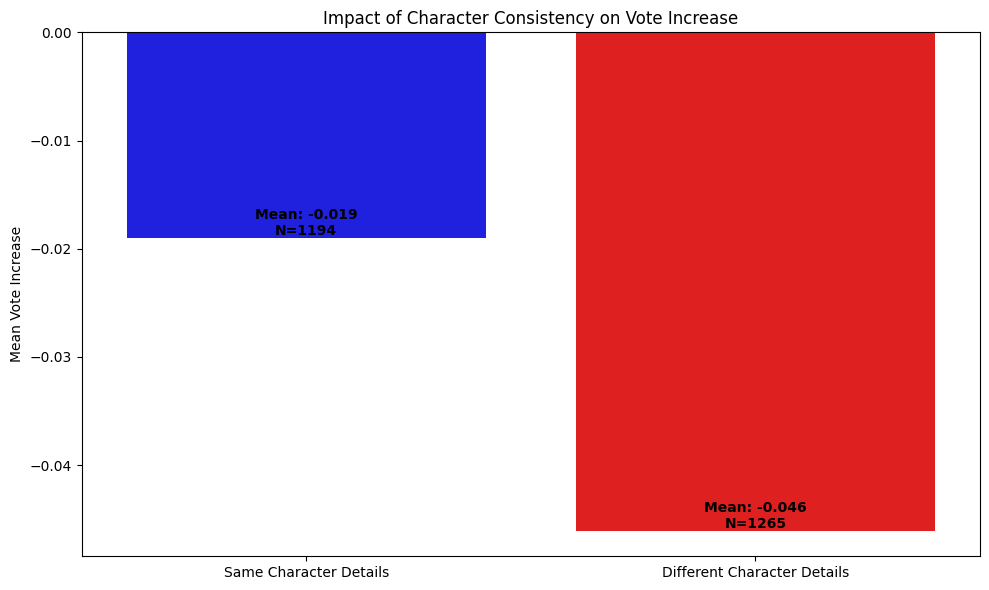

In [30]:

# Create a bar chart to visualize the difference
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Category', y='Mean Vote Increase', data=comparison_df, palette=['blue', 'red'])
plt.title('Impact of Character Consistency on Vote Increase')
plt.ylabel('Mean Vote Increase')
plt.xlabel('')

# Add text annotations on bars
for i, row in enumerate(comparison_df.itertuples()):
    ax.text(i, row._2, f'Mean: {row._2:.3f}\nN={row._3}', 
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

ในหนังที่มีมีการเปลี่ยนแปลงรายละเอียดตัวละครในภาคต่อ มีการเปลี่ยนแปลงการโหวดที่ดีขึ้นเฉลี่ย 7%
(เปลี่ยนแปลงตัวละครหลักไม่ได้ทำให้หนังแย่ลง)

### 5.2 วิเคราะห์ให้ลึกไปอีก ว่าการเปลี่ยนแปลงตัวละครแต่ละแบบส่งผลหรือไม่

#### 5.2.1 Visualization แสดงผลกระทบของความแตกต่างในตัวละครในภาคถัดไป

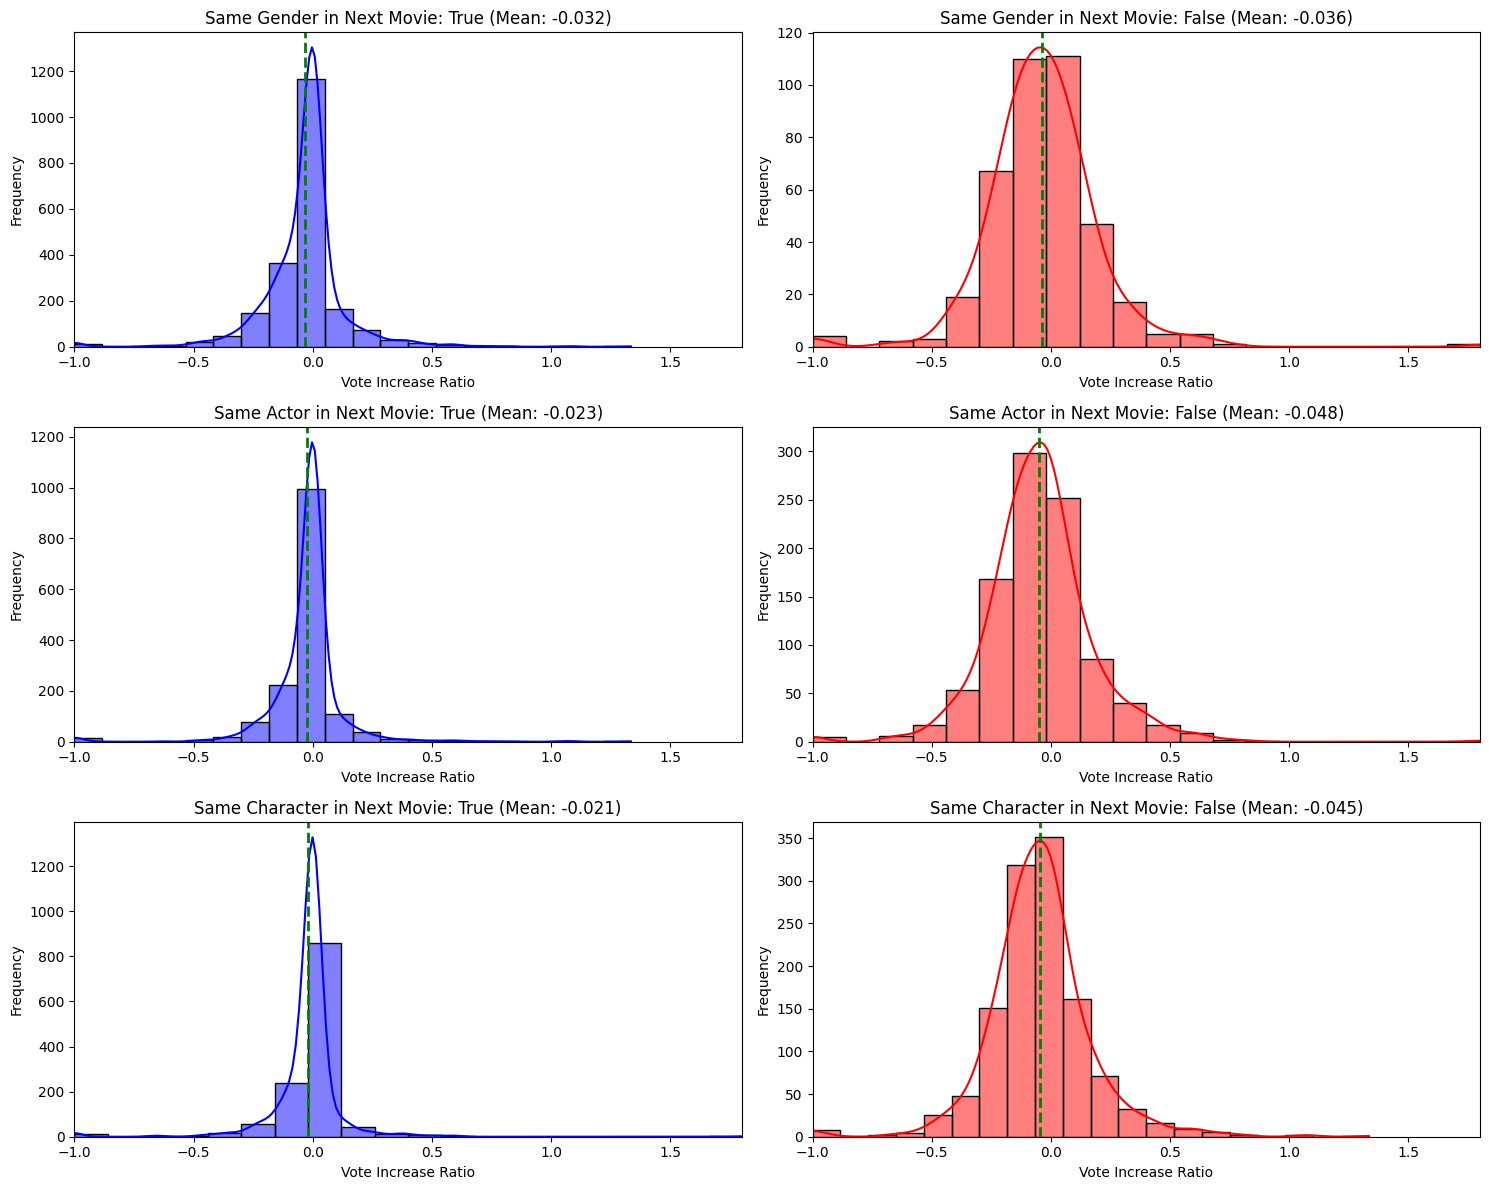

In [31]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# Find global min and max for consistent x-axis limits
min_val = df_insight['vote_increase'].min()
max_val = df_insight['vote_increase'].max()

# next_main_cast_gender_same
# True
true_gender_data = df_insight[df_insight['next_main_cast_gender_same']==True]['vote_increase']
true_gender_mean = true_gender_data.mean()
sns.histplot(data=true_gender_data, kde=True, bins=20, ax=axes[0, 0], color='blue')
axes[0, 0].axvline(true_gender_mean, color='green', linestyle='--', linewidth=2)
axes[0, 0].set_title(f'Same Gender in Next Movie: True (Mean: {true_gender_mean:.3f})')
axes[0, 0].set_xlabel('Vote Increase Ratio')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_xlim(min_val, max_val)

# False
false_gender_data = df_insight[df_insight['next_main_cast_gender_same']==False]['vote_increase']
false_gender_mean = false_gender_data.mean()
sns.histplot(data=false_gender_data, kde=True, bins=20, ax=axes[0, 1], color='red')
axes[0, 1].axvline(false_gender_mean, color='green', linestyle='--', linewidth=2)
axes[0, 1].set_title(f'Same Gender in Next Movie: False (Mean: {false_gender_mean:.3f})')
axes[0, 1].set_xlabel('Vote Increase Ratio')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_xlim(min_val, max_val)

# next_main_cast_actor_name_same
# True
true_actor_data = df_insight[df_insight['next_main_cast_actor_name_same']==True]['vote_increase']
true_actor_mean = true_actor_data.mean()
sns.histplot(data=true_actor_data, kde=True, bins=20, ax=axes[1, 0], color='blue')
axes[1, 0].axvline(true_actor_mean, color='green', linestyle='--', linewidth=2)
axes[1, 0].set_title(f'Same Actor in Next Movie: True (Mean: {true_actor_mean:.3f})')
axes[1, 0].set_xlabel('Vote Increase Ratio')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_xlim(min_val, max_val)

# False
false_actor_data = df_insight[df_insight['next_main_cast_actor_name_same']==False]['vote_increase']
false_actor_mean = false_actor_data.mean()
sns.histplot(data=false_actor_data, kde=True, bins=20, ax=axes[1, 1], color='red')
axes[1, 1].axvline(false_actor_mean, color='green', linestyle='--', linewidth=2)
axes[1, 1].set_title(f'Same Actor in Next Movie: False (Mean: {false_actor_mean:.3f})')
axes[1, 1].set_xlabel('Vote Increase Ratio')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_xlim(min_val, max_val)

# next_main_cast_same
# True
true_character_data = df_insight[df_insight['next_main_cast_same']==True]['vote_increase']
true_character_mean = true_character_data.mean()
sns.histplot(data=true_character_data, kde=True, bins=20, ax=axes[2, 0], color='blue')
axes[2, 0].axvline(true_character_mean, color='green', linestyle='--', linewidth=2)
axes[2, 0].set_title(f'Same Character in Next Movie: True (Mean: {true_character_mean:.3f})')
axes[2, 0].set_xlabel('Vote Increase Ratio')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].set_xlim(min_val, max_val)

# False
false_character_data = df_insight[df_insight['next_main_cast_same']==False]['vote_increase']
false_character_mean = false_character_data.mean()
sns.histplot(data=false_character_data, kde=True, bins=20, ax=axes[2, 1], color='red')
axes[2, 1].axvline(false_character_mean, color='green', linestyle='--', linewidth=2)
axes[2, 1].set_title(f'Same Character in Next Movie: False (Mean: {false_character_mean:.3f})')
axes[2, 1].set_xlabel('Vote Increase Ratio')
axes[2, 1].set_ylabel('Frequency')
axes[2, 1].set_xlim(min_val, max_val)

plt.tight_layout()
plt.show()



#### 5.2.2 สร้างตารางสรุปแต่ละประเภท

In [32]:
plot_data = {
    'Comparison': ['Gender', 'Gender', 'Actor', 'Actor', 'Character', 'Character'],
    'Same in Next Movie': ['True', 'False', 'True', 'False', 'True', 'False'],
    'Mean Vote Increase': [
        f'{true_gender_mean:.3f}', 
        f'{false_gender_mean:.3f}',
        f'{true_actor_mean:.3f}', 
        f'{false_actor_mean:.3f}',
        f'{true_character_mean:.3f}', 
        f'{false_character_mean:.3f}'
    ],
    'Sample Size': [
        f'{len(true_gender_data)}',
        f'{len(false_gender_data)}',
        f'{len(true_actor_data)}',
        f'{len(false_actor_data)}',
        f'{len(true_character_data)}',
        f'{len(false_character_data)}'
    ]
}

summary_df = pd.DataFrame(plot_data)
summary_df['Same in Next Movie'] = summary_df['Same in Next Movie'].map({'True': True, 'False': False})
summary_df['Sample Size'] = summary_df['Sample Size'].astype(int)
summary_df = summary_df.set_index(['Comparison', 'Same in Next Movie'])
summary_df = summary_df.sort_index()
summary_df

Mean Vote Increase  Sample Size
Comparison Same in Next Movie                                
Actor      False                          -0.048          954
           True                           -0.023         1505
Character  False                          -0.045         1208
           True                           -0.021         1251
Gender     False                          -0.036          392
           True                           -0.032         2067

การเปลี่ยนแปลงรายละเอียดตัวละครทุกแบบไม่ได้ทำให้คะแนนในภาคถัดไปลดลง และยังทำให้เพิ่มขึ้นด้วยซ้ำ ดังนั้นเราต้องวิเคราะห์ให้ลึกไปอีก

### 5.3 วิเคราะห์หนังที่มี vote เพิ่มในภาคถัดไป และลดในภาคภัดไป

#### 5.3.1 สร้างชุดที่เก็บ keyword และจำนวนของที่ Vote Increase เพิ่มขึ้น และ Vote Increase ลดลง

In [33]:
# Perform basic analysis to see if keywords affect vote increase
print("\nKeyword Analysis for Vote Increase:")

# Split data into two groups
vote_increase_df = interested[interested["vote_increase"] >= 0]
vote_decrease_df = interested[interested["vote_increase"] < 0]

print(f"Number of movies with increased votes: {len(vote_increase_df)}")
print(f"Number of movies with decreased votes: {len(vote_decrease_df)}")

# Get keyword columns
keyword_columns = [col for col in interested.columns if col.startswith('keyword_')]

# Calculate keyword frequencies for each group
increase_keywords = {}
decrease_keywords = {}

for col in keyword_columns:
    keyword = col[8:]  # Remove 'keyword_' prefix
    
    # Count occurrences in increased votes group
    increase_count = vote_increase_df[col].sum()
    if increase_count > 0:
        increase_keywords[keyword] = increase_count
    
    # Count occurrences in decreased votes group
    decrease_count = vote_decrease_df[col].sum()
    if decrease_count > 0:
        decrease_keywords[keyword] = decrease_count

# Create DataFrames for visualization
increase_df = pd.DataFrame(list(increase_keywords.items()), columns=['Keyword', 'Count'])
increase_df = increase_df.sort_values('Count', ascending=False)

decrease_df = pd.DataFrame(list(decrease_keywords.items()), columns=['Keyword', 'Count'])
decrease_df = decrease_df.sort_values('Count', ascending=False)


Keyword Analysis for Vote Increase:
Number of movies with increased votes: 1357
Number of movies with decreased votes: 1102


#### 5.3.2 แสดง Top 10 ของ หนังที่มี vote เพิ่มในภาคถัดไป และลดในภาคภัดไป

In [34]:
# Display top keywords for each group
print("\nTop 10 keywords in movies with increased votes:")
print(increase_df.head(10))

print("\nTop 10 keywords in movies with decreased votes:")
print(decrease_df.head(10))


Top 10 keywords in movies with increased votes:
             Keyword  Count
1867  woman director     36
2745        violence     36
2832  based on novel     35
2782           anime     33
3631             sex     31
2327          murder     31
98           vampire     30
3410           magic     30
3337    martial arts     29
3017       superhero     28

Top 10 keywords in movies with decreased votes:
               Keyword  Count
2318            murder     54
2753          violence     43
1994           revenge     38
3336      martial arts     37
2847    based on novel     35
2361          dystopia     33
1878    woman director     32
2680             blood     31
2656           monster     30
2690  independent film     29


### 5.4 เปลี่ยบเทียบความถี่ keyword แต่ละคำ ว่าอยู่ในที่เพิ่มขึ้นและลดลงในอัตราอย่างไร

#### 5.4.1 สร้างตารางเพื่อเปลี่ยบเทียบความถี่ keyword แต่ละคำ ว่าอยู่ในที่เพิ่มขึ้นและลดลงในอัตราเท่าไร

In [35]:
# Compare relative frequencies of top keywords between groups
top_keywords = pd.concat([
    increase_df.head(15)['Keyword'], 
    decrease_df.head(15)['Keyword']
]).unique()

comparison_data = []
for keyword in top_keywords:
    keyword_col = f'keyword_{keyword}'
    if keyword_col in interested.columns:
        # Calculate percentages
        increase_pct = vote_increase_df[keyword_col].mean() * 100
        decrease_pct = vote_decrease_df[keyword_col].mean() * 100
        
        comparison_data.append({
            'Keyword': keyword,
            'Increased Votes (%)': increase_pct,
            'Decreased Votes (%)': decrease_pct,
            'Difference': increase_pct - decrease_pct
        })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('Difference', ascending=False)

print("\nComparison of keyword frequencies between groups:")
print(comparison_df)


Comparison of keyword frequencies between groups:
             Keyword  Increased Votes (%)  Decreased Votes (%)  Difference
3              anime             2.431835             1.361162    1.070673
6            vampire             2.210759             1.542650    0.668109
10        friendship             2.063375             1.542650    0.520725
9          superhero             2.063375             1.633394    0.429981
7              magic             2.210759             2.087114    0.123645
4                sex             2.284451             2.268603    0.015848
12     female nudity             1.842299             1.905626   -0.063327
11             sport             1.915991             1.996370   -0.080379
13           musical             1.842299             2.087114   -0.244815
0     woman director             2.652911             2.903811   -0.250900
21            nudity             1.694915             2.268603   -0.573687
2     based on novel             2.579219        

#### 5.4.2 สร้าง WordCloud เพื่อเปลี่ยบเทียบความถี่ keyword แต่ละคำ ว่าอยู่ในที่เพิ่มขึ้นและลดลงในอัตราเท่าไร

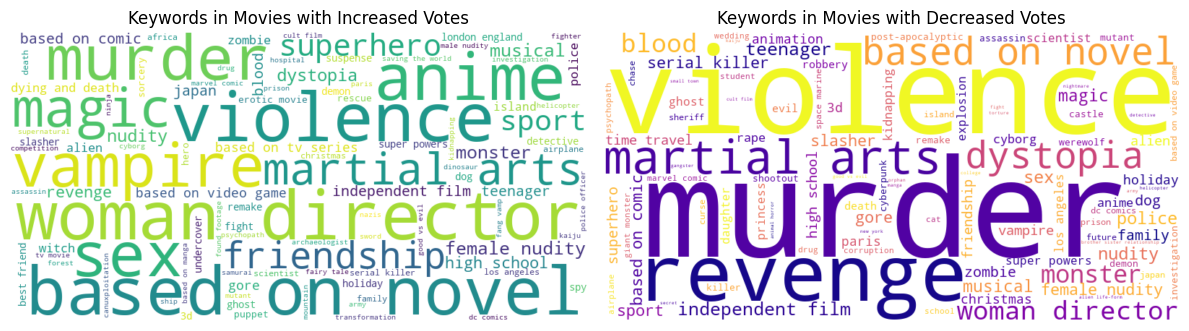

In [36]:
from wordcloud import WordCloud

plt.figure(figsize=(12, 5))

# Word cloud for increased votes
plt.subplot(1, 2, 1)
wordcloud_increase = WordCloud(width=800, height=400, background_color='white', 
                              max_words=100, colormap='viridis').generate_from_frequencies(increase_keywords)
plt.imshow(wordcloud_increase, interpolation='bilinear')
plt.title('Keywords in Movies with Increased Votes')
plt.axis('off')

# Word cloud for decreased votes
plt.subplot(1, 2, 2)
wordcloud_decrease = WordCloud(width=800, height=400, background_color='white', 
                              max_words=100, colormap='plasma').generate_from_frequencies(decrease_keywords)
plt.imshow(wordcloud_decrease, interpolation='bilinear')
plt.title('Keywords in Movies with Decreased Votes')
plt.axis('off')

plt.tight_layout()
plt.show()


จะเห็นว่ามีบาง keyword ที่พบบ่อยในหนังภาคต่อที่มี Vote ลดลง แต่ไม่พบในอันที่มีโหวดเพิ่มขึ้น
เช่น revenge, dystopia, murder และมีบางอันที่แทบไม่พบเลย เช่น Woman Director
เราจะใช้วิธีการสุ่มตัวอย่างและวิธีการทางสถิติเพื่อหา keyword ที่ถ้าพบแล้วหนังมักจะมีคะแนนลดลงหรือเพิ่มขึ้นน้อย โดยไม่ใช่เรื่องบังเอิญ อันมาจาก Distribution ของ keyword

#### 5.4.3 เปรียบเทียบ keyword ว่ามีผลต่อ Vote Increase ต่างกันเพียงใด

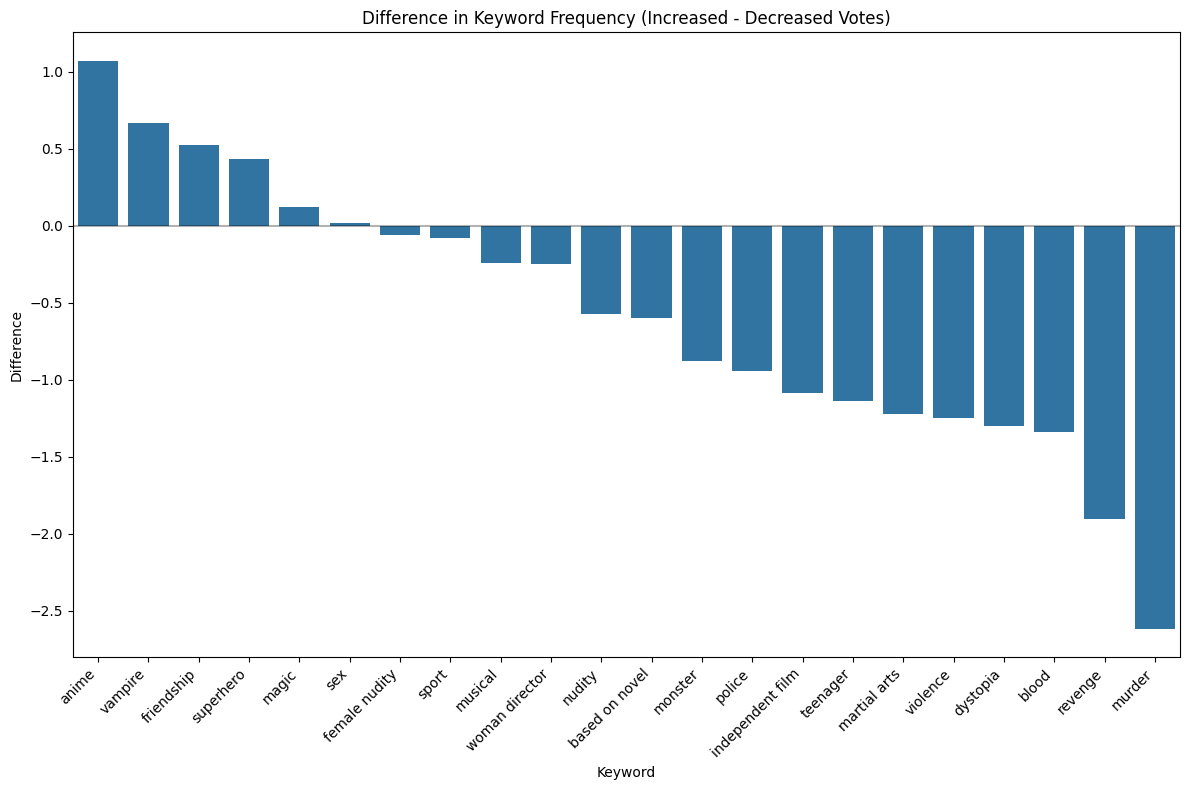

In [37]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Keyword', y='Difference', data=comparison_df)
plt.title('Difference in Keyword Frequency (Increased - Decreased Votes)')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

### 5.5 ค้นพบข้อสังเกตที่นำไปสู่ Insight

keyword แบบไหนที่ทำให้ Vote ในภาคต่อไปมีคะแนนโหวดเพิ่มขึ้นน้อยลงหรือต่ำลงกว่า แบบที่ไม่มี keyword นี้

## 6. ใช้การสุ่ม และสถิติหาว่า keyword ใดส่งผลให้ vote_increase ลด มากที่สุด

### 6.1 เตรียมการดำเนินการ

#### 6.1.1 สร้าง DataFrame เพื่อเก็บ "หนัง" ที่มี word_increase เพิ่ม และ word_increase ลด

In [38]:
decreased_votes_df = interested[interested["vote_increase"] < 0]
increased_votes_df = interested[interested["vote_increase"] >= 0]


#### 6.1.2 หาว่ามี keyword ใดบ้าง โดยดูจากชื่อ column

In [39]:
# Create X (features) and y (target)
keyword_columns = [col for col in interested.columns if col.startswith('keyword_')]

#### 6.1.3 กรอง Keyword ที่มีจำนวนน้อยเกินไปออก (<10) และสร้าง y ซึ่งคือ Feature ที่สนใจว่า vote_increase จะลดหรือไม่

In [40]:
# Filter out rare keywords (occurring less than 5 times in total)
keyword_counts = interested[keyword_columns].sum()
frequent_keywords = keyword_counts[keyword_counts >= 10].index.tolist()

X = interested[frequent_keywords]
y = (interested["vote_increase"] < 0).astype(int) 

### 6.2 ดำเนินการ

#### 6.2.1 ตั้งสมมุติฐาน และออกแบบการทดลอง

- ทำการใช้ chi2 test ดูความ predictive ของ keyword นั้นส่งผลกับ vote_increase ไหม
- โดยทำการทดสอบ permutation_test กับทุก keyword ที่ทำให้ค่าเฉลี่ย vote_increase น้อยลง ว่าทำให้น้อยลงจริงๆไหม โดยตั้งสมมุติฐานดังนี้
- H0 : keyword ทำให้มี vote_increae น้อยลงเป็นเรื่องบังเอิญ
- H1 : keyword ทำให้มี vote_increae น้อยลงเป็นเรื่องไม่บังเอิญ
- ถ้ายอมรับ H1 เป็นจริง จะบันทึก keyword นั้น และค่า statistic ของ chi2 ไว้คู่กัน
- เรียงลำดับ keyword ที่ยอมรับ H1 จากค่า chi2 หรือความ predictive

ขั้นตอนสรุปโดยสังเขปดังนี้
1. แบ่งหนังตามคะแนน
2. นับ keyword
3. เลือก keyword ไม่พบบ่อยน้อยเกินไป     (ไม่ต่ำกว่า 10 ครั้ง)
4. หาคำที่สัมพันธ์กับการลดคะแนน โดยดูจากความ predictive ด้วย chi2
5. เรียงลำดับคำตามความสัมพันธ์
6. แสดงคำที่สำคัญที่สุด

#### 6.2.2 ดำเนินการ permutation_test และ chisquare

In [41]:
chi2_values, p_values = chi2(X, y)

permutation_results = {}

n_permutations = 1000

for i, col in enumerate(frequent_keywords):
    keyword = col[8:] 

    if decreased_votes_df[col].sum() > 0:
        decreased_pct = decreased_votes_df[col].sum() / len(decreased_votes_df)
        increased_pct = increased_votes_df[col].sum() / len(increased_votes_df) if len(increased_votes_df) > 0 else 0
        observed_diff = decreased_pct - increased_pct

        if observed_diff <= 0:
            continue

        permutation_diffs = []
        combined_data = interested[col].values
        combined_labels = y.values
        
        for _ in range(n_permutations):
            shuffled_labels = shuffle(combined_labels)
            
            perm_decreased = combined_data[shuffled_labels == 1]
            perm_increased = combined_data[shuffled_labels == 0]
            
            perm_decreased_pct = np.mean(perm_decreased) if len(perm_decreased) > 0 else 0
            perm_increased_pct = np.mean(perm_increased) if len(perm_increased) > 0 else 0
            
            permutation_diffs.append(perm_decreased_pct - perm_increased_pct)
        
        # proportion of permutations with diff >= observed)
        p_value = np.mean([diff >= observed_diff for diff in permutation_diffs])
        
        if p_value < ALPHA: 
            ratio = decreased_pct / increased_pct if increased_pct > 0 else float('inf')
            permutation_results[keyword] = {
                'chi2': chi2_values[i],
                'diff' : observed_diff,
                'p_value': p_value,
                'ratio': ratio,
                'decreased_pct': decreased_pct * 100,
                'increased_pct': increased_pct * 100,
                'count': keyword_counts[col]
            }

#### 6.2.3 สร้าง word_cloud โดยใช้ความ predictive เป็น weight 
- หรือก็คือ keyword ที่มีความสามารถในการ predictive การลด vote increase จะมีน้ำหนักมาก

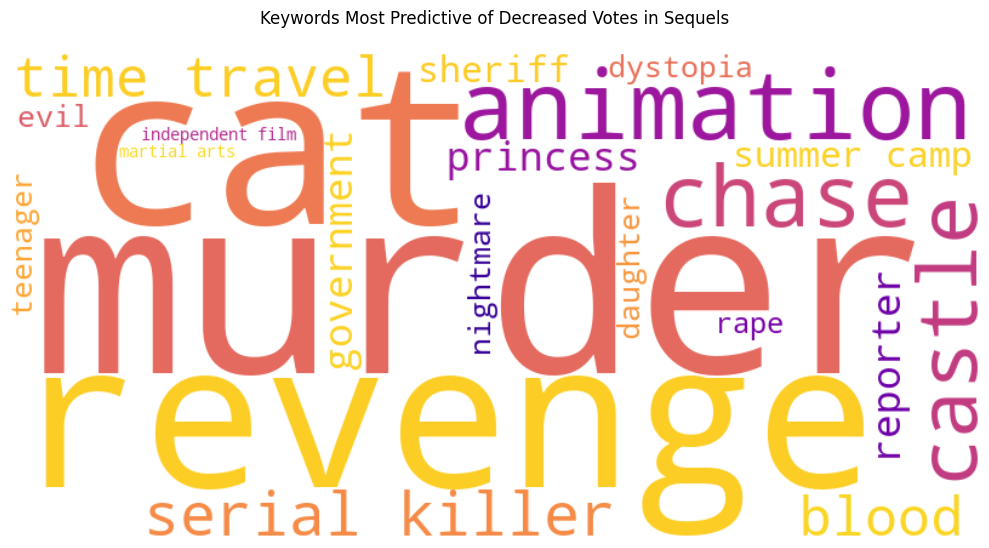

In [42]:
# sort by chi2 value
sorted_keywords = {k: v for k, v in sorted(permutation_results.items(), 
                                          key=lambda item: item[1]['chi2'], 
                                          reverse=True)}

wordcloud_dict = {k: v['chi2'] for k, v in sorted_keywords.items()}

wordcloud = WordCloud(width=800, height=400, background_color='white', 
                        max_words=100, colormap='plasma').generate_from_frequencies(wordcloud_dict)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Keywords Most Predictive of Decreased Votes in Sequels\n')
plt.tight_layout()
plt.show()


#### 6.2.4 คำสำคัญที่ทำนายการลดลงของคะแนนโหวตในภาคต่อได้มากที่สุด:

In [43]:
for i, (keyword, stats_dict) in enumerate(list(sorted_keywords.items())[:10]):
    print(f"{i+1}. {keyword}: {stats_dict['decreased_pct']:.2f}% ในกลุ่มที่คะแนนลดลง vs "
            f"{stats_dict['increased_pct']:.2f}% ในกลุ่มที่คะแนนเพิ่มขึ้น "
            f"(อัตราส่วน: {stats_dict['ratio']:.2f}, ค่า p-value: {stats_dict['p_value']:.4f}, "
            f"จำนวนที่พบทั้งหมด: {stats_dict['count']})")

1. murder: 4.90% ในกลุ่มที่คะแนนลดลง vs 2.28% ในกลุ่มที่คะแนนเพิ่มขึ้น (อัตราส่วน: 2.15, ค่า p-value: 0.0000, จำนวนที่พบทั้งหมด: 85)
2. cat: 0.91% ในกลุ่มที่คะแนนลดลง vs 0.07% ในกลุ่มที่คะแนนเพิ่มขึ้น (อัตราส่วน: 12.31, ค่า p-value: 0.0000, จำนวนที่พบทั้งหมด: 11)
3. revenge: 3.45% ในกลุ่มที่คะแนนลดลง vs 1.55% ในกลุ่มที่คะแนนเพิ่มขึ้น (อัตราส่วน: 2.23, ค่า p-value: 0.0050, จำนวนที่พบทั้งหมด: 59)
4. animation: 1.45% ในกลุ่มที่คะแนนลดลง vs 0.37% ในกลุ่มที่คะแนนเพิ่มขึ้น (อัตราส่วน: 3.94, ค่า p-value: 0.0050, จำนวนที่พบทั้งหมด: 21)
5. chase: 1.00% ในกลุ่มที่คะแนนลดลง vs 0.22% ในกลุ่มที่คะแนนเพิ่มขึ้น (อัตราส่วน: 4.52, ค่า p-value: 0.0130, จำนวนที่พบทั้งหมด: 14)
6. castle: 1.09% ในกลุ่มที่คะแนนลดลง vs 0.29% ในกลุ่มที่คะแนนเพิ่มขึ้น (อัตราส่วน: 3.69, ค่า p-value: 0.0140, จำนวนที่พบทั้งหมด: 16)
7. serial killer: 2.00% ในกลุ่มที่คะแนนลดลง vs 0.88% ในกลุ่มที่คะแนนเพิ่มขึ้น (อัตราส่วน: 2.26, ค่า p-value: 0.0170, จำนวนที่พบทั้งหมด: 34)
8. time travel: 1.54% ในกลุ่มที่คะแนนลดลง vs 0.59% ในกลุ่มที่

### 6.3 หาค่า Confidence Interval ที่ 95% ของ ค่าเฉลี่ยของความแตกต่างละหว่างการลดลงของ Vote Increase ในหนังที่มี keyword กับหนังที่ไม่มี keyword นั้น

#### 6.3.1 แบ่งชุดข้อมูลที่มี keyword นั้นกับที่ไม่มี

In [44]:
list(sorted_keywords.keys())
# find the row that contain one of the keyword
# Let's find examples of movies that contain the top predictive keywords
top_keywords = list(sorted_keywords.keys())[:15]  # Get top 15 keywords
nt = []
for k in top_keywords:
    nt.append("keyword_"+k)

def contains_top_keyword(row):
    return sum(row[nt]) != 0

contain_keyword = interested[interested.apply(lambda x: contains_top_keyword(x), axis=1)]
not_contain_keyword = interested[interested.apply(lambda x: not contains_top_keyword(x), axis=1)]


In [45]:
mean_with_keywords = contain_keyword["vote_increase"].mean()
mean_without_keywords = not_contain_keyword["vote_increase"].mean()
difference = mean_with_keywords - mean_without_keywords
pct = mean_with_keywords/mean_without_keywords*100

In [46]:
print(f"{top_keywords}")
print(f"หนังที่มี keyword เหล่านี้ในภาคต่อไปมักจะมีคะแนนต่ำกว่าหนังที่ไม่มี keyword เหล่านี้ {pct:.2f}%")

['murder', 'cat', 'revenge', 'animation', 'chase', 'castle', 'serial killer', 'time travel', 'blood', 'princess', 'government', 'reporter', 'summer camp', 'sheriff', 'dystopia']
หนังที่มี keyword เหล่านี้ในภาคต่อไปมักจะมีคะแนนต่ำกว่าหนังที่ไม่มี keyword เหล่านี้ 234.15%


#### 6.3.2 Visualize Impact ของการมี keyword เหล่่านี้ หรือการไม่มี

C:\Users\sunmodza\AppData\Local\Temp\ipykernel_1760\2593429068.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Category', y='Mean Vote Increase', data=comparison_data, palette=['#ff9999', '#66b3ff'])
c:\Users\sunmodza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\sunmodza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


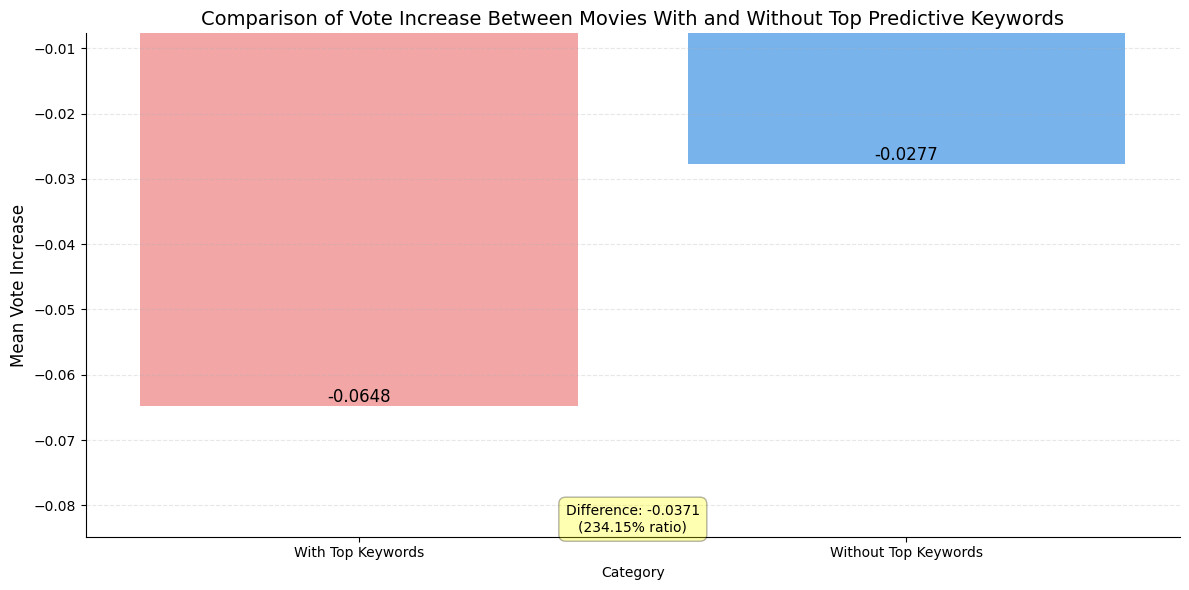

In [47]:
# Prepare data for seaborn
comparison_data = pd.DataFrame({
    'Category': ['With Top Keywords', 'Without Top Keywords'],
    'Mean Vote Increase': [mean_with_keywords, mean_without_keywords]
})

# Create the bar chart with seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Category', y='Mean Vote Increase', data=comparison_data, palette=['#ff9999', '#66b3ff'])

# Add data labels on top of the bars
for i, v in enumerate(comparison_data['Mean Vote Increase']):
    ax.text(i, v, f'{v:.4f}', ha='center', va='bottom', fontsize=12)

# Add a horizontal line at y=0
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.7)

# Add title and labels
plt.title('Comparison of Vote Increase Between Movies With and Without Top Predictive Keywords', fontsize=14)
plt.ylabel('Mean Vote Increase', fontsize=12)
plt.ylim(min(comparison_data['Mean Vote Increase']) - 0.02, max(comparison_data['Mean Vote Increase']) + 0.02)

# Add annotation about the difference
plt.annotate(f'Difference: {difference:.4f}\n({pct:.2f}% ratio)',
             xy=(0.5, min(comparison_data['Mean Vote Increase']) - 0.01),
             xytext=(0.5, min(comparison_data['Mean Vote Increase']) - 0.015),
             ha='center', va='top',
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.3))

# Add styling
sns.despine(left=False, bottom=False)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

#### 6.3.3 หา CI ที่ 95% ของความแตกต่างระหว่างการมีกับไม่มี keyword นั้น

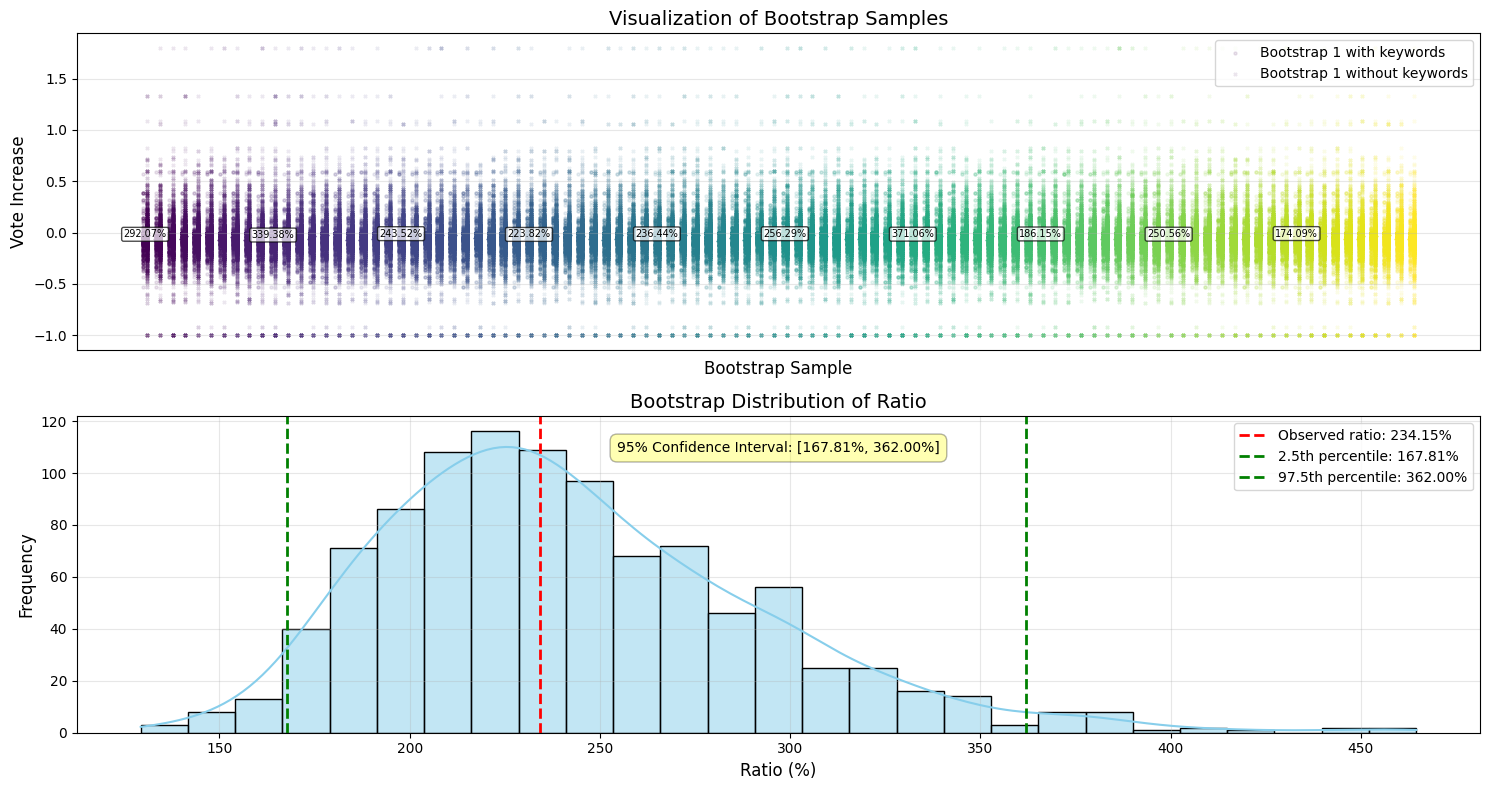

In [48]:
# Calculate confidence interval for the ratio (pct) using bootstrap sampling
n_bootstrap = 1000
bootstrap_ratios = []

np.random.seed(42)

plt.figure(figsize=(15, 8))

plt.subplot(2, 1, 1)
sample_to_show = 100
colors = plt.cm.viridis(np.linspace(0, 1, sample_to_show))

for i in range(n_bootstrap):
    sample_with = contain_keyword.sample(len(contain_keyword), replace=True)["vote_increase"]
    sample_without = not_contain_keyword.sample(len(not_contain_keyword), replace=True)["vote_increase"]

    mean_with_sample = sample_with.mean()
    mean_without_sample = sample_without.mean()

    ratio = mean_with_sample / mean_without_sample * 100
    bootstrap_ratios.append(ratio)

    if i < sample_to_show:
        plt.scatter(np.ones(len(sample_with)) * (i+1), sample_with, 
                   alpha=0.1, color=colors[i], s=5, label=f'Bootstrap {i+1} with keywords' if i == 0 else "")
        plt.scatter(np.ones(len(sample_without)) * (i+1.3), sample_without, 
                   alpha=0.1, color=colors[i], marker='x', s=5, label=f'Bootstrap {i+1} without keywords' if i == 0 else "")

        plt.hlines(mean_with_sample, i+0.8, i+1.2, colors=colors[i], linewidth=1)
        plt.hlines(mean_without_sample, i+1.1, i+1.5, colors=colors[i], linewidth=1, linestyle='--')

        if i % 10 == 0:
            plt.text(i+1.15, (mean_with_sample + mean_without_sample)/2, 
                    f'{ratio:.2f}%', fontsize=7, ha='center', 
                    bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.7))

plt.title('Visualization of Bootstrap Samples', fontsize=14)
plt.ylabel('Vote Increase', fontsize=12)
plt.xlabel('Bootstrap Sample', fontsize=12)
plt.grid(alpha=0.3)
plt.xticks([])
plt.legend()

plt.subplot(2, 1, 2)
bootstrap_ratios = np.array(bootstrap_ratios)

lower_ci = np.percentile(bootstrap_ratios, 2.5)
upper_ci = np.percentile(bootstrap_ratios, 97.5)

sns.histplot(bootstrap_ratios, kde=True, color='skyblue')
plt.axvline(pct, color='red', linestyle='dashed', linewidth=2, label=f'Observed ratio: {pct:.2f}%')
plt.axvline(lower_ci, color='green', linestyle='dashed', linewidth=2, label=f'2.5th percentile: {lower_ci:.2f}%')
plt.axvline(upper_ci, color='green', linestyle='dashed', linewidth=2, label=f'97.5th percentile: {upper_ci:.2f}%')

plt.title('Bootstrap Distribution of Ratio', fontsize=14)
plt.xlabel('Ratio (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()

plt.annotate(f'95% Confidence Interval: [{lower_ci:.2f}%, {upper_ci:.2f}%]',
             xy=(0.5, 0.9), xycoords='axes fraction',
             ha='center', va='center',
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.3))

plt.tight_layout()
plt.show()

## 7. ทดสอบสมมุติฐานที่ได้ในขั้นตอนที่แล้วว่า
- H0 (สมมติฐานหลัก): 
    - การที่พบว่า ภาพยนตร์ที่มี keyword เหล่านั้น มีแนวโน้มที่จะมีคะแนนเพิ่มขึ้นในภาคถัดไป น้อยกว่า ภาพยนตร์ที่ไม่มี keyword เหล่านั้น โดยเฉลี่ย 0.0371 (ต่างกัน 234.15%) เป็นเรื่องบังเอิญ
- H1 (สมมติฐานทางเลือก): 
    - ภาพยนตร์ที่มี keyword เหล่านั้น มีแนวโน้มที่จะมีคะแนนเพิ่มขึ้นในภาคถัดไป น้อยกว่า ภาพยนตร์ที่ไม่มี keyword เหล่านั้น โดยเฉลี่ย 0.0371 (ต่างกัน 234.15%)

### 7.1 ดำเนินการหาโดยใช้ bootstrap

In [49]:
# Perform bootstrap test to see if movies with these keywords have significantly lower vote increases
n_bootstrap = 1000
observed_diff = contain_keyword["vote_increase"].mean() - not_contain_keyword["vote_increase"].mean()
print(observed_diff)
# Bootstrap sampling
bootstrap_diffs = []
for _ in range(n_bootstrap):
    # Resample with replacement from each group
    #sample_with = np.random.choice(interested["vote_increase"], size=len(contain_keyword))
    sample_with = interested.sample(len(contain_keyword))["vote_increase"]
    sample_without = interested.drop(contain_keyword.index)["vote_increase"]
    
    # Calculate the difference in means for this bootstrap sample
    bootstrap_diff = np.mean(sample_with) - np.mean(sample_without)
    bootstrap_diffs.append(bootstrap_diff)

# Calculate p-value (proportion of bootstrap samples with difference >= observed_diff)
# For a one-sided test (less than), we count how many bootstrap differences are <= observed_diff
p_value = np.mean(np.array(bootstrap_diffs) <= observed_diff)


print(f"ผลการทดสอบ Bootstrap (n={n_bootstrap}):")
print(f"ความแตกต่างของค่าเฉลี่ยที่สังเกตได้: {observed_diff:.4f}")
print(f"ที่ CI 95% สำหรับความแตกต่าง: [{np.percentile(bootstrap_diffs, 2.5):.4f}, {np.percentile(bootstrap_diffs, 97.5):.4f}]")
print(f"ค่า p-value (การทดสอบทางเดียว): {p_value:.6f}")

if p_value < ALPHA:
    print(f"ผลลัพธ์มีนัยสำคัญทางสถิติ (p < {ALPHA}).")
    print(f"ภาพยนตร์ที่มี keyword เหล่านี้มีการเพิ่มขึ้นของคะแนนโหวตต่ำกว่าภาพยนตร์ที่ไม่มี keyword เหล่านี้อย่างมีนัยสำคัญ")
    
    # Calculate the mean difference
    print(f"ค่าเฉลี่ยการเพิ่มขึ้นของคะแนนโหวตที่มี keyword: {mean_with_keywords:.4f}")
    print(f"ค่าเฉลี่ยการเพิ่มขึ้นของคะแนนโหวตที่ไม่มี keyword: {mean_without_keywords:.4f}")
    print(f"ความแตกต่าง: {pct:.4f}%")
else:
    print(f"ผลลัพธ์ไม่มีนัยสำคัญทางสถิติ (p >= {ALPHA}).")

-0.03713769370120137
ผลการทดสอบ Bootstrap (n=1000):
ความแตกต่างของค่าเฉลี่ยที่สังเกตได้: -0.0371
ที่ CI 95% สำหรับความแตกต่าง: [-0.0232, 0.0123]
ค่า p-value (การทดสอบทางเดียว): 0.000000
ผลลัพธ์มีนัยสำคัญทางสถิติ (p < 0.05).
ภาพยนตร์ที่มี keyword เหล่านี้มีการเพิ่มขึ้นของคะแนนโหวตต่ำกว่าภาพยนตร์ที่ไม่มี keyword เหล่านี้อย่างมีนัยสำคัญ
ค่าเฉลี่ยการเพิ่มขึ้นของคะแนนโหวตที่มี keyword: -0.0648
ค่าเฉลี่ยการเพิ่มขึ้นของคะแนนโหวตที่ไม่มี keyword: -0.0277
ความแตกต่าง: 234.1542%


### 7.2 แสดงค่า p-value

C:\Users\sunmodza\AppData\Local\Temp\ipykernel_1760\3782972546.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bootstrap_diffs)


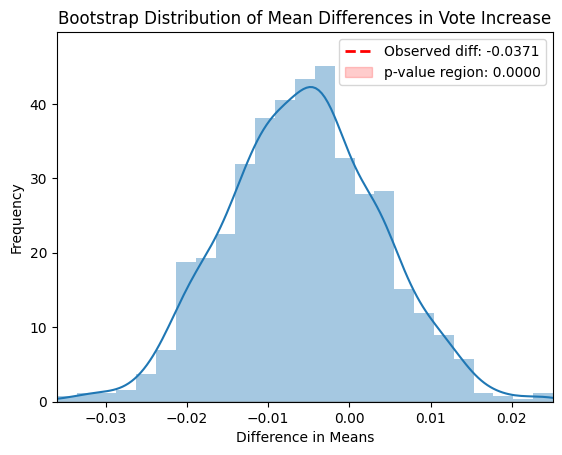

In [50]:
sns.distplot(bootstrap_diffs)
plt.axvline(observed_diff, color='red', linestyle='dashed', linewidth=2, label=f'Observed diff: {observed_diff:.4f}')
plt.title('Bootstrap Distribution of Mean Differences in Vote Increase')
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')

# Highlight the p-value area on the plot
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)  # Add a horizontal line at y=0 for reference

# Calculate the 5% threshold for highlighting
threshold_index = int(0.05 * len(bootstrap_diffs))
sorted_diffs = np.sort(bootstrap_diffs)
threshold_value = sorted_diffs[threshold_index]

# Highlight the area representing the p-value
plt.fill_between(
    np.linspace(-9, observed_diff, 100),
    0, 
    plt.gca().get_ylim()[1],
    color='red', 
    alpha=0.2,
    label=f'p-value region: {p_value:.4f}'
)
plt.xlim(min(bootstrap_diffs),max(bootstrap_diffs))

plt.legend()

### 7.4 สรุปสมมุติฐาน

หา P-value ได้ 0 ความน่าจะเป็น H0 เป็น 0 ซึ่งน้อยกว่า Alpha จึงปฏิเสธ H0 และยอมรับ H1 จึงสรุปได้ว่า

“พบว่า Movie ที่มี keyword เหล่านี้ มักจะมีคะแนนเพิ่มขึ้น ในภาคต่อไปน้อยกว่าถึง 234.15% เทียบกับ Movie ที่ไม่มี keyword เหล่านี้”

### (เสริม) ทดสอบว่าหากมี keyword นี้กับไม่มี keyword จะมีความแตกต่างของ vote average ในภาคปัจจุบันไหม

0.17550120605258712


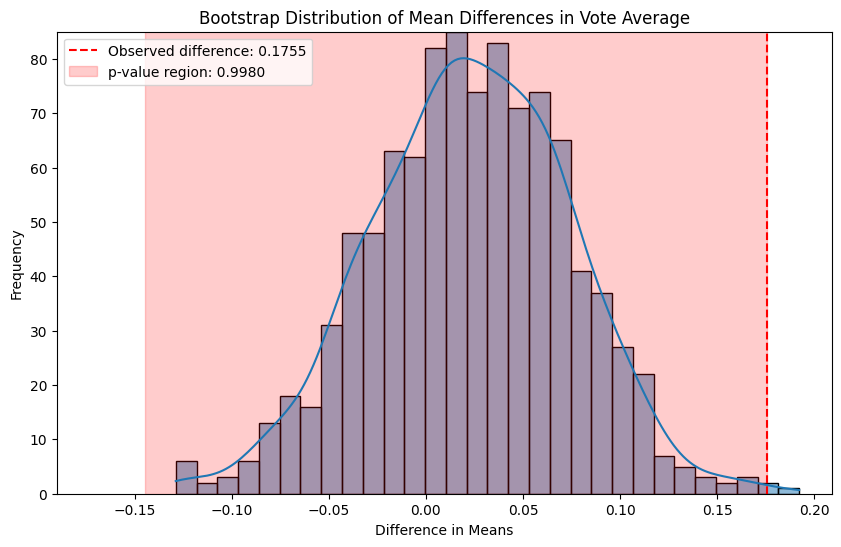

ผลการทดสอบ Bootstrap (n=1000):
ความแตกต่างของค่าเฉลี่ยที่สังเกตได้: 0.1755
ที่ CI 95% สำหรับความแตกต่าง: [-0.0791, 0.1163]
ค่า p-value (การทดสอบทางเดียว): 0.998000
ผลลัพธ์ไม่มีนัยสำคัญทางสถิติ (p >= 0.05).
ยอมรับ H0 ว่า
การที่ภาพยนตร์ที่มีคำสำคัญเหล่านี้มีคะแนนโหวตน้อยกว่าจากหนังที่ไม่มี keyword เหล่านี้ เป็นเรื่องบังเอิญ


In [51]:
n_bootstrap = 1000
observed_diff = contain_keyword["vote_average"].mean() - not_contain_keyword["vote_average"].mean()
print(observed_diff)

bootstrap_diffs = []
for _ in range(n_bootstrap):
    sample_with = interested.sample(len(contain_keyword))["vote_average"]
    sample_without = interested.drop(contain_keyword.index)["vote_average"]

    bootstrap_diff = np.mean(sample_with) - np.mean(sample_without)
    bootstrap_diffs.append(bootstrap_diff)

p_value = np.mean(np.array(bootstrap_diffs) <= observed_diff)

mean_with_keywords = contain_keyword["vote_average"].mean()
mean_without_keywords = not_contain_keyword["vote_average"].mean()
pct = (mean_with_keywords - mean_without_keywords) / mean_without_keywords * 100

plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_diffs, bins=30, kde=True)
plt.axvline(observed_diff, color='red', linestyle='--', 
            label=f'Observed difference: {observed_diff:.4f}')

plt.fill_between(
    np.linspace(plt.gca().get_xlim()[0], observed_diff, 100),
    0, 
    plt.gca().get_ylim()[1],
    color='red', 
    alpha=0.2,
    label=f'p-value region: {p_value:.4f}'
)
plt.ylim(0,85)
plt.xlim(-0.19)
plt.title('Bootstrap Distribution of Mean Differences in Vote Average')
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.legend()
plt.show()


print(f"ผลการทดสอบ Bootstrap (n={n_bootstrap}):")
print(f"ความแตกต่างของค่าเฉลี่ยที่สังเกตได้: {observed_diff:.4f}")
print(f"ที่ CI 95% สำหรับความแตกต่าง: [{np.percentile(bootstrap_diffs, 2.5):.4f}, {np.percentile(bootstrap_diffs, 97.5):.4f}]")
print(f"ค่า p-value (การทดสอบทางเดียว): {p_value:.6f}")

if p_value < ALPHA:
    print(f"ผลลัพธ์มีนัยสำคัญทางสถิติ (p < {ALPHA}).")
    print(f"ภาพยนตร์ที่มีคำสำคัญเหล่านี้มีคะแนนโหวตต่ำกว่าภาพยนตร์ที่ไม่มี keyword เหล่านี้อย่างมีนัยสำคัญ")

    print(f"ค่าเฉลี่ยคะแนนโหวตที่มี keyword: {mean_with_keywords:.4f}")
    print(f"ค่าเฉลี่ยงคะแนนโหวตที่ไม่มี keyword: {mean_without_keywords:.4f}")
    print(f"ความแตกต่าง: {pct:.4f}%")
else:
    print(f"ผลลัพธ์ไม่มีนัยสำคัญทางสถิติ (p >= {ALPHA}).")
    print(f"ยอมรับ H0 ว่า")
    print("การที่ภาพยนตร์ที่มีคำสำคัญเหล่านี้มีคะแนนโหวตน้อยกว่าจากหนังที่ไม่มี keyword เหล่านี้ เป็นเรื่องบังเอิญ")



## สรุปผลการค้นหา Insight

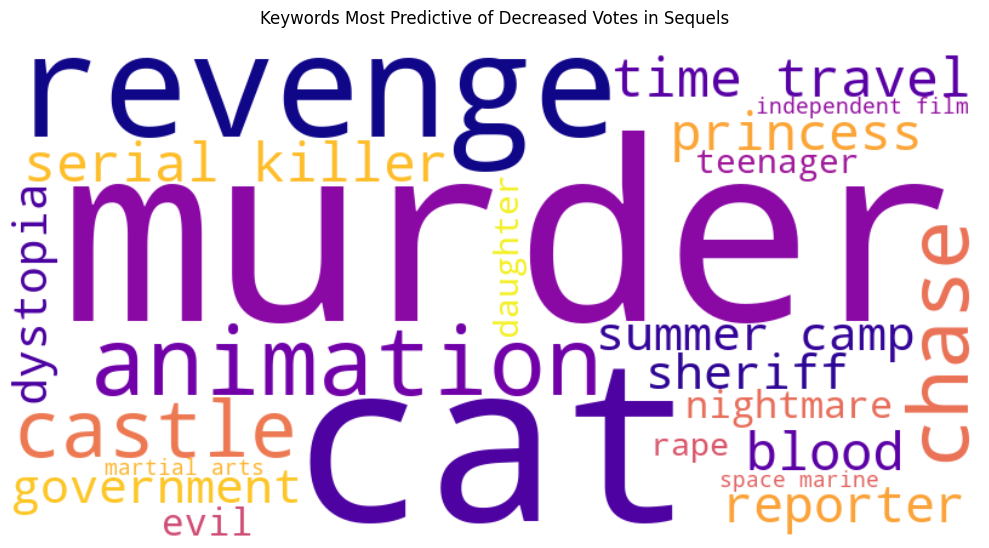

### 1. พบว่า Movie ที่มี keyword เหล่านี้ มักจะมีคะแนนเพิ่มขึ้น ในภาคต่อไปน้อยกว่าถึง 234.15% เทียบกับ Movie ที่ไม่มี keyword เหล่านี้ 
### 2. แม้ keyword เหล่านี้ จะมีผลให้หนังภาคต่อไป มี vote ต่ำลง แต่กลับไม่มีผลทำให้คะแนน vote ปัจจุบัน แตกต่างเลย

# EDA - 6610402116 ธีร์ อนุสรณ์ศาสน์

## 1. Import Library

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from scipy.stats import pearsonr, spearmanr



## 2. Load data

In [73]:
df=pd.read_csv("cleaned/cleaned_6610402116.csv")
df.head()

Unnamed: 0     id release_date      revenue                       genres  \
0           0    862   1995-10-30  373554033.0      Animation Comedy Family   
1           1   8844   1995-12-15  262797249.0     Adventure Fantasy Family   
2           3  31357   1995-12-22   81452156.0         Comedy Drama Romance   
3           4  11862   1995-02-10   76578911.0                       Comedy   
4           5    949   1995-12-15  187436818.0  Action Crime Drama Thriller   

   vote_count  runtime    budget  vote_average  release_month  release_year  
0      5415.0     81.0  30000000           7.7             10          1995  
1      2413.0    104.0  65000000           6.9             12          1995  
2        34.0    127.0  16000000           6.1             12          1995  
3       173.0    106.0         0           5.7              2          1995  
4      1886.0    170.0  60000000           7.7             12          1995

## 3. วิเคราะห์ข้อมูล

### 3.1 วิเคราะห์การกระจายตัวของข้อมูลที่เป็นตัวเลข

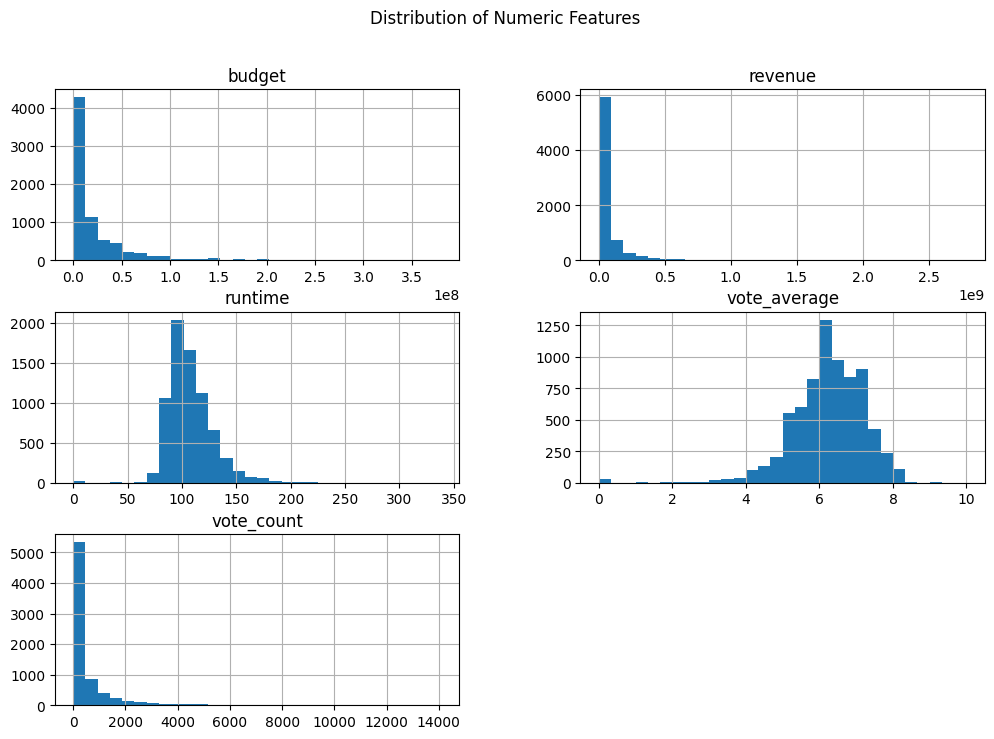

In [74]:
# การกระจายค่าของตัวเลขสำคัญ
num_cols = ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count']
df[num_cols].hist(figsize=(12, 8), bins=30)
plt.suptitle("Distribution of Numeric Features")
plt.show()

### 3.2 วิเคราะห์การกระจายตัวของข้อมูล โดยใช้ log tranformation

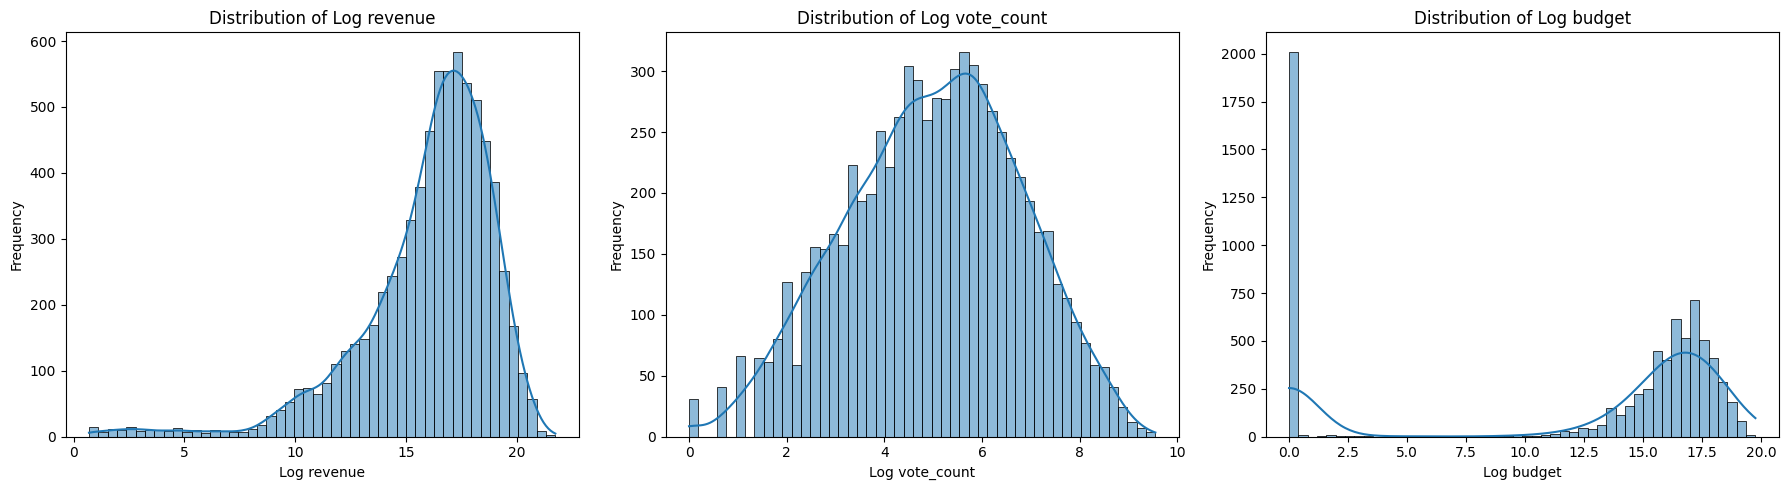

In [75]:
columns = ['revenue', 'vote_count', 'budget']

# สร้าง subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  

for i, col in enumerate(columns):
    sns.histplot(np.log1p(df[col]), bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of Log {col}')
    axes[i].set_xlabel(f'Log {col}')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### 3.3 วิเคราะห์ความสัมพันธ์กันของแต่ละคอลัมณ์

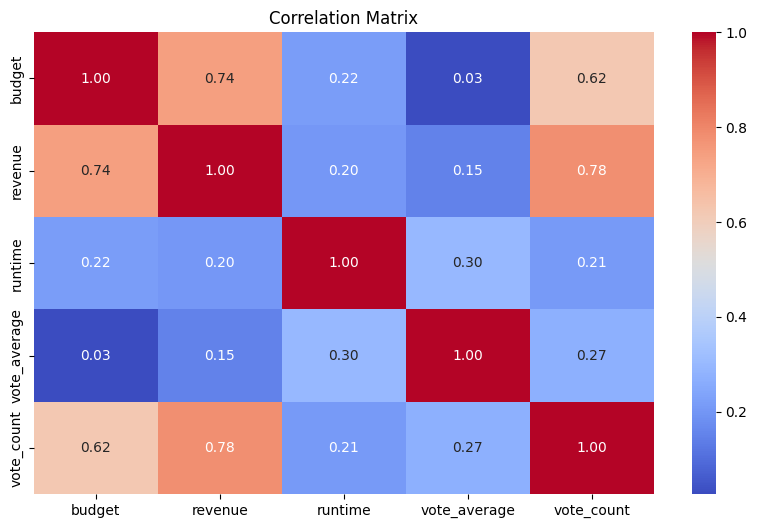

In [76]:
# ตรวจสอบความสัมพันธ์ระหว่างตัวเลข
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### 3.4 วิเคราะห์ความสัมพันธ์ของข้อมูลโดยใช้ scatter plot

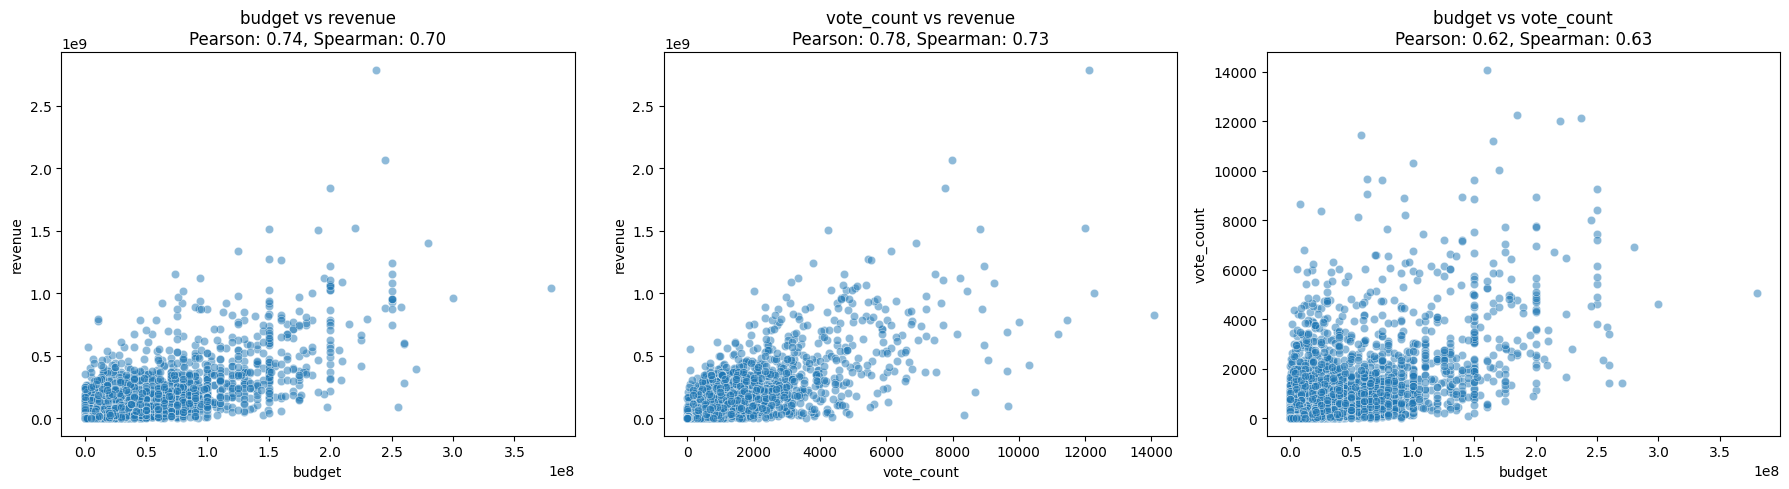

In [77]:
pairs = [('budget', 'revenue'), ('vote_count', 'revenue'), ('budget', 'vote_count')]

# สร้างกราฟ Scatter Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (x, y) in enumerate(pairs):
    # คำนวณ Pearson และ Spearman correlation
    pearson_corr, _ = pearsonr(df[x], df[y])
    spearman_corr, _ = spearmanr(df[x], df[y])

    # Scatter plot
    sns.scatterplot(data=df, x=x, y=y, ax=axes[i], alpha=0.5)
    axes[i].set_title(f'{x} vs {y}\nPearson: {pearson_corr:.2f}, Spearman: {spearman_corr:.2f}')

plt.tight_layout()
plt.show()

### 3.5 วิเคราะห์แนวโน้มการทำรายได้ของภาพยนต์ในแต่ละปี
<p> จะเห็นได้ว่าอุตสาหกรรมภาพยนต์มีการเติบโตขึ้นอย่างต่อเนื่อง

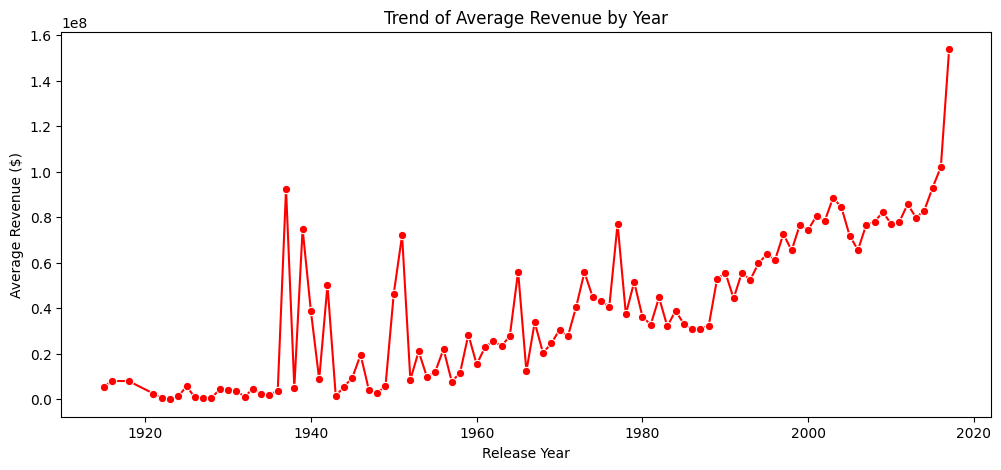

In [78]:

# คำนวณรายได้เฉลี่ยของแต่ละปี
yearly_revenue = df.groupby('release_year')['revenue'].mean().reset_index()

# ดูแนวโน้มรายได้เฉลี่ยต่อปี
plt.figure(figsize=(12, 5))
sns.lineplot(x='release_year', y='revenue', data=yearly_revenue, marker="o", color='red')
plt.title("Trend of Average Revenue by Year")
plt.xlabel("Release Year")
plt.ylabel("Average Revenue ($)")
plt.show()

### 3.6 วิเคราะห์รายได้ของภาพยนต์ในแต่ละช่วงเดือน

จะเห็นได้ว่าในช่วงไตรมาสที่ 2 ของปี ภาพยนต์มีแนวโน้มที่จะทำรายได้สูง

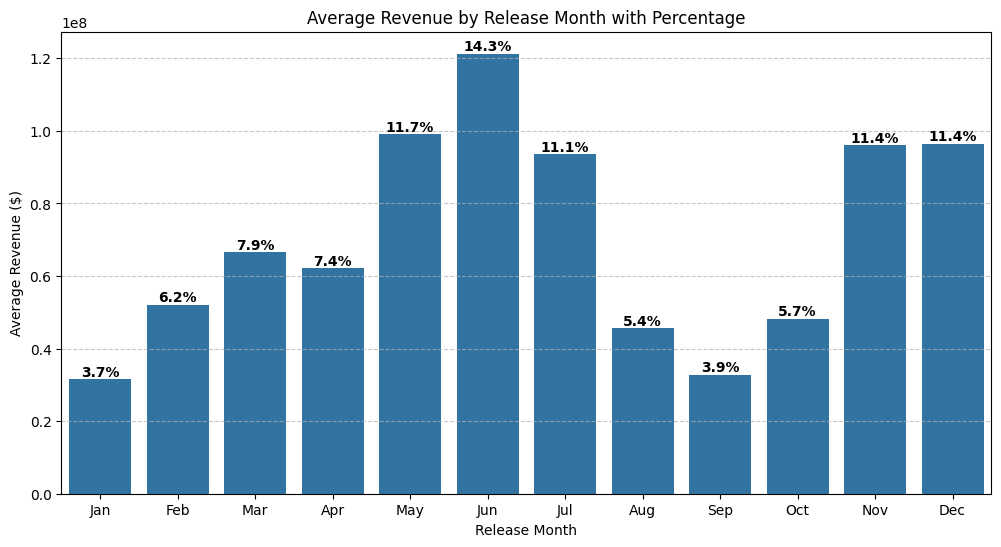

In [79]:
monthly_revenue = df.groupby('release_month')['revenue'].mean().sort_index()

# คำนวณ % ของแต่ละเดือน
total_revenue = monthly_revenue.sum()
monthly_percent = (monthly_revenue / total_revenue) * 100

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values)

# แสดง % บนแต่ละแท่ง
for index, value in enumerate(monthly_revenue.values):
    percent = monthly_percent.iloc[index]
    plt.text(index, value, f"{percent:.1f}%", ha="center", va="bottom", fontsize=10, fontweight="bold")

plt.xlabel("Release Month")
plt.ylabel("Average Revenue ($)")
plt.title("Average Revenue by Release Month with Percentage")
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

### 3.7 วิเคราะห์รายได้ของภาพยนต์ในแต่ละช่วงเดือนโดยแยกตามหมวดหมู่ของภาพยนต์

c:\Users\sunmodza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\sunmodza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\sunmodza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = group

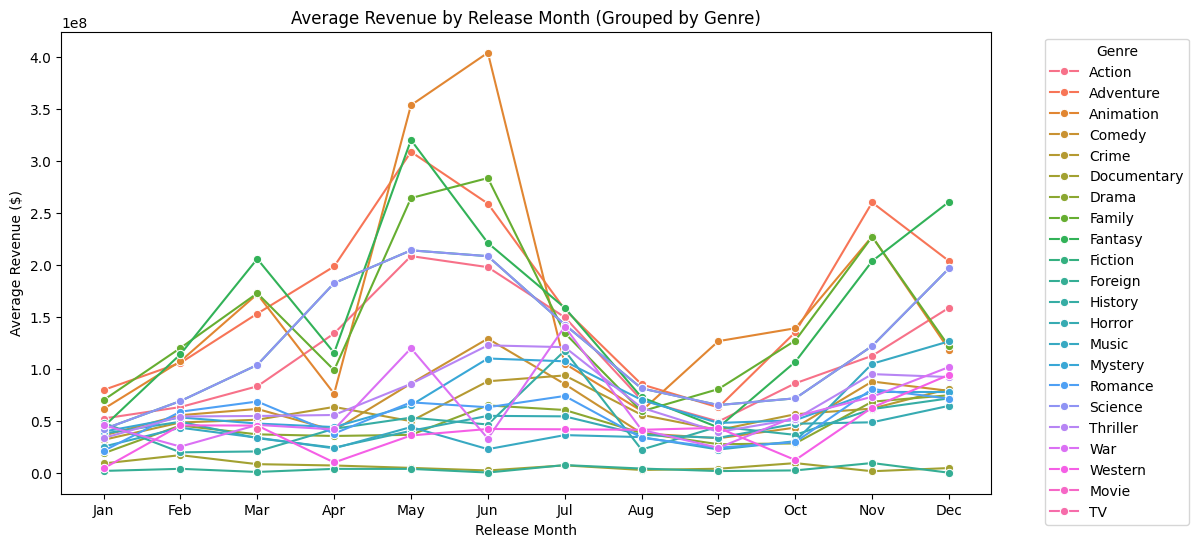

In [80]:

df['genres'] = df['genres'].str.split(' ')  # แยก genres ถ้ามีหลายแนว
df_genres = df.explode('genres')  # ขยายข้อมูลให้ 1 แนวหนังต่อ 1 แถว


# คำนวณรายได้เฉลี่ยของแต่ละเดือน ตาม Genre
genre_monthly_revenue = df_genres.groupby(['release_month', 'genres'])['revenue'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_monthly_revenue, x='release_month', y='revenue', hue='genres', marker="o")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Average Revenue by Release Month (Grouped by Genre)")
plt.xlabel("Release Month")
plt.ylabel("Average Revenue ($)")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [81]:
print(df_genres['genres'].unique())

['Animation' 'Comedy' 'Family' 'Adventure' 'Fantasy' 'Drama' 'Romance'
 'Action' 'Crime' 'Thriller' 'History' 'Science' 'Fiction' 'Mystery'
 'Music' 'Horror' 'War' 'Documentary' 'Foreign' 'Western' 'TV' 'Movie']


### 3.8 กราฟแสดงจำนวนภาพยนต์ในแต่ละหมวดหมู่

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'Animation'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Family'),
  Text(3, 0, 'Adventure'),
  Text(4, 0, 'Fantasy'),
  Text(5, 0, 'Drama'),
  Text(6, 0, 'Romance'),
  Text(7, 0, 'Action'),
  Text(8, 0, 'Crime'),
  Text(9, 0, 'Thriller'),
  Text(10, 0, 'History'),
  Text(11, 0, 'Science'),
  Text(12, 0, 'Fiction'),
  Text(13, 0, 'Mystery'),
  Text(14, 0, 'Music'),
  Text(15, 0, 'Horror'),
  Text(16, 0, 'War'),
  Text(17, 0, 'Documentary'),
  Text(18, 0, 'Foreign'),
  Text(19, 0, 'Western'),
  Text(20, 0, 'TV'),
  Text(21, 0, 'Movie')])

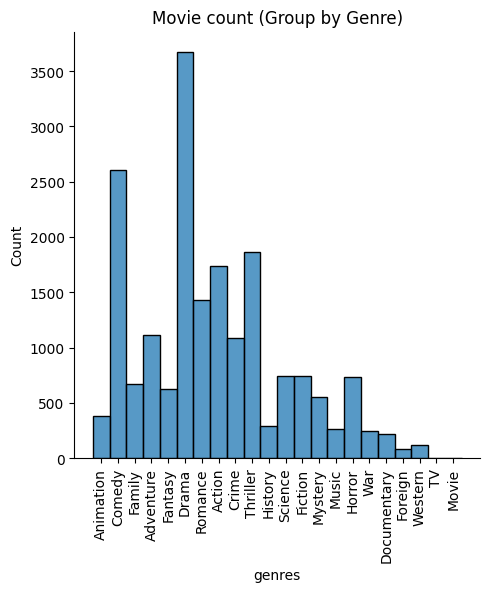

In [82]:
sns.displot(df_genres['genres'])
plt.title("Movie count (Group by Genre)")
plt.xticks(rotation=90)

### 3.9 กราฟแสดงคะแนนโหวตเฉลี่ยของภาพยนต์ในแต่ละหมวดหมู่

C:\Users\sunmodza\AppData\Local\Temp\ipykernel_1760\2628672632.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_avg_score.index, y=genre_avg_score.values, palette="viridis")
c:\Users\sunmodza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\sunmodza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_dat

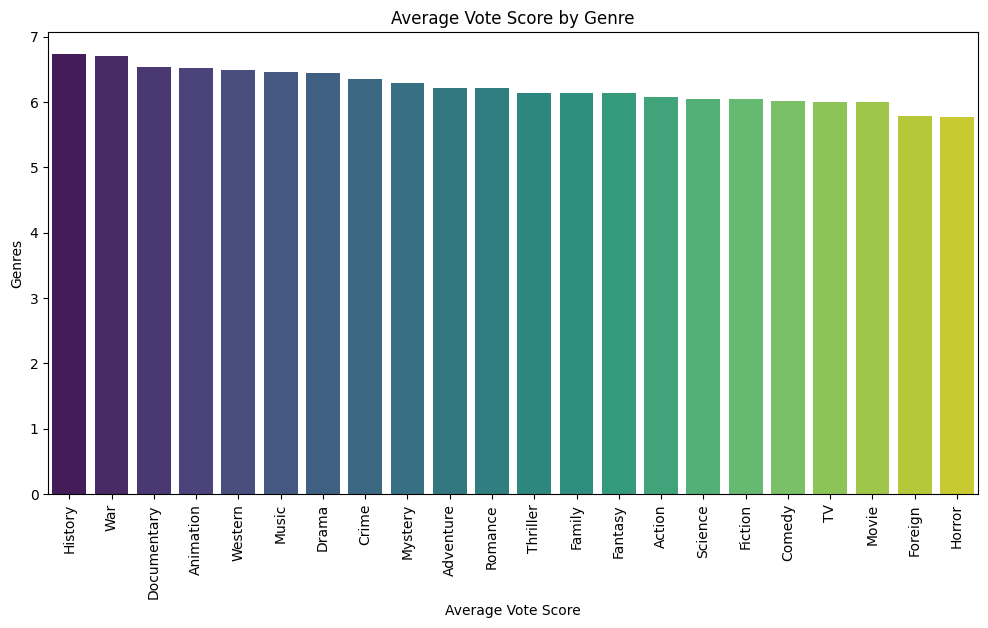

In [83]:
# คำนวณคะแนนเฉลี่ยของแต่ละแนว
genre_avg_score = df_genres.groupby('genres')['vote_average'].mean().sort_values(ascending=False)

# แสดงผลลัพธ์
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_avg_score.index, y=genre_avg_score.values, palette="viridis")
plt.xlabel("Average Vote Score")
plt.ylabel("Genres")
plt.title("Average Vote Score by Genre")
plt.xticks(rotation=90)
plt.show()

### 3.10 แสดงการทำรายได้ของภาพยนต์แต่ละหมวดหมู่

C:\Users\sunmodza\AppData\Local\Temp\ipykernel_1760\1095842703.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_revenue.index, y=genre_revenue.values, palette="viridis")
c:\Users\sunmodza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\sunmodza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.ge

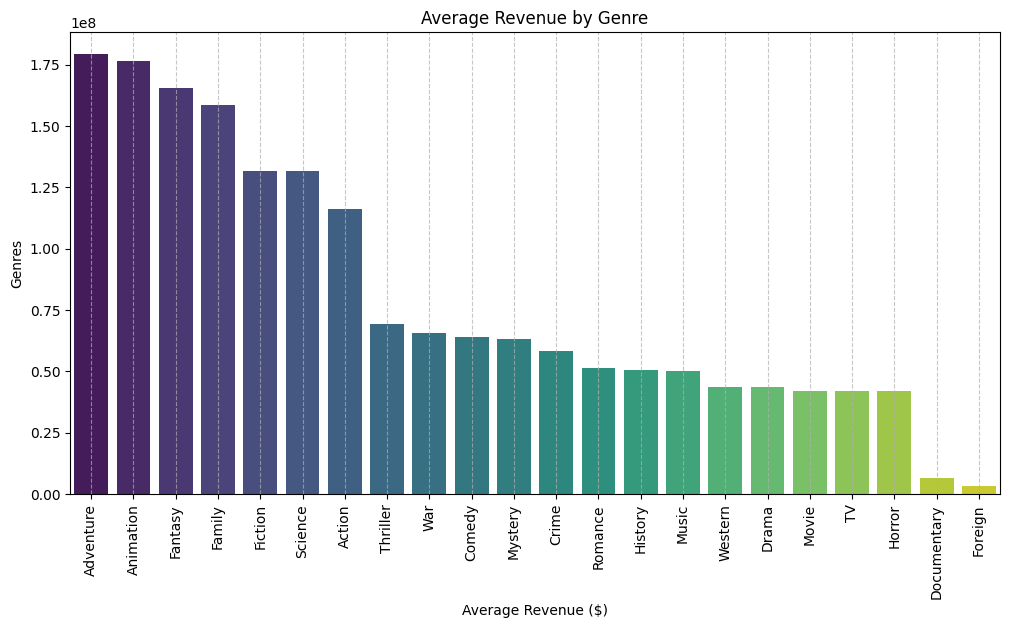

In [84]:
# คำนวณรายได้เฉลี่ยของแต่ละแนวหนัง
genre_revenue = df_genres.groupby('genres')['revenue'].mean().sort_values(ascending=False)

# วาดกราฟ Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_revenue.index, y=genre_revenue.values, palette="viridis")

plt.xlabel("Average Revenue ($)")
plt.ylabel("Genres")
plt.title("Average Revenue by Genre")
plt.xticks(rotation=90)
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()

### 3.11 แสดงรายได้เฉลี่ยในไตรมาส 2 เทียบกับรายได้เฉลี่ยในแต่ละปี

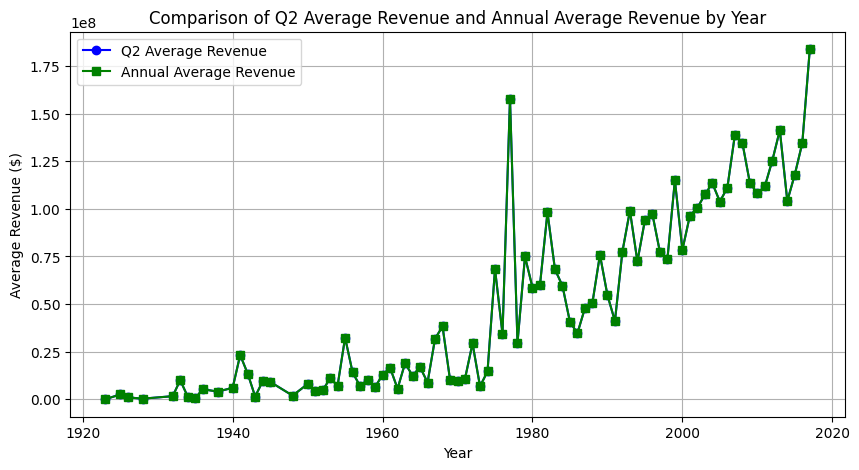

In [85]:
df['release_date'] = pd.to_datetime(df['release_date'])
df_q2=df[df['release_month'].isin([4, 5, 6])]
q2_avg_per_year = df_q2.groupby(df_q2['release_date'].dt.year)['revenue'].mean()

# คำนวณรายได้เฉลี่ยทั้งปี
annual_avg_per_year = df.groupby(df_q2['release_date'].dt.year)['revenue'].mean()

# สร้างกราฟเปรียบเทียบรายได้เฉลี่ย Q2 และรายได้เฉลี่ยทั้งปี
plt.figure(figsize=(10, 5))
plt.plot(q2_avg_per_year.index, q2_avg_per_year.values, marker='o', label="Q2 Average Revenue", color='b')
plt.plot(annual_avg_per_year.index, annual_avg_per_year.values, marker='s', label="Annual Average Revenue", color='g')

plt.xlabel("Year")
plt.ylabel("Average Revenue ($)")
plt.title("Comparison of Q2 Average Revenue and Annual Average Revenue by Year")
plt.legend()
plt.grid(True)
plt.show()

### 3.12 แสดง % ที่ไตรมาส2ทำรายได้สูงกว่ารายได้เฉลี่ยในแต่ละปี

ค่าเฉลี่ยของ % ที่รายได้เฉลี่ยใน Q2 สูงกว่ารายได้เฉลี่ยของทั้งปี: 11.92%


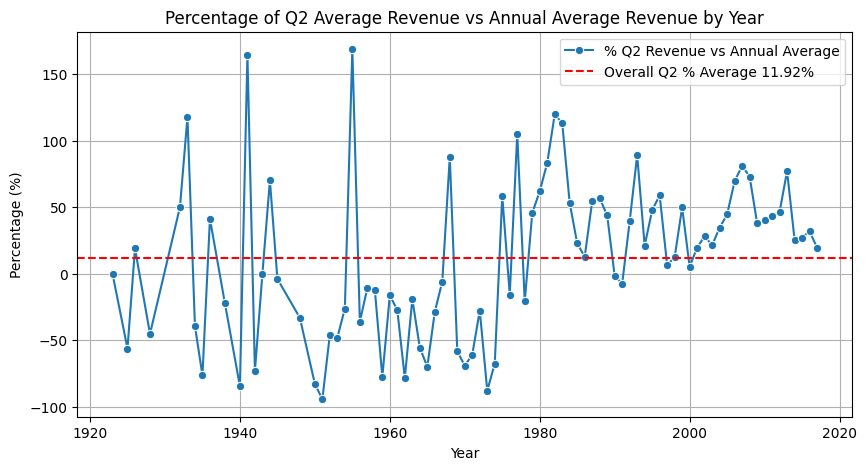

In [86]:
df_q2 = df[pd.to_datetime(df['release_date']).dt.month.isin([4, 5, 6])]
q2_avg_per_year = df_q2.groupby(pd.to_datetime(df_q2['release_date']).dt.year)['revenue'].mean()

# คำนวณรายได้เฉลี่ยทั้งปี
annual_avg_per_year = df.groupby(pd.to_datetime(df['release_date']).dt.year)['revenue'].mean()

# คำนวณเปอร์เซ็นต์ที่รายได้เฉลี่ยใน Q2 สูงกว่ารายได้เฉลี่ยทั้งปี
q2_vs_annual_percentage = ((q2_avg_per_year-annual_avg_per_year) / annual_avg_per_year ) * 100

# คำนวณค่าเฉลี่ยของเปอร์เซ็นต์
overall_q2_percentage_avg = q2_vs_annual_percentage.mean()
print(f"ค่าเฉลี่ยของ % ที่รายได้เฉลี่ยใน Q2 สูงกว่ารายได้เฉลี่ยของทั้งปี: {overall_q2_percentage_avg:,.2f}%")


plt.figure(figsize=(10, 5))
sns.lineplot(x=q2_vs_annual_percentage.index, y=q2_vs_annual_percentage.values, marker='o', label="% Q2 Revenue vs Annual Average")
plt.axhline(overall_q2_percentage_avg, color='r', linestyle='--', label=f"Overall Q2 % Average {overall_q2_percentage_avg:,.2f}%")
plt.xlabel("Year")
plt.ylabel("Percentage (%)")
plt.title("Percentage of Q2 Average Revenue vs Annual Average Revenue by Year")
plt.legend()
plt.grid(True)
plt.show()

### 3.13 แสดงรายได้เฉลี่ยในไตรมาส 2 เทียบกับรายได้เฉลี่ยในแต่ละปี

<Figure size 1000x500 with 0 Axes>

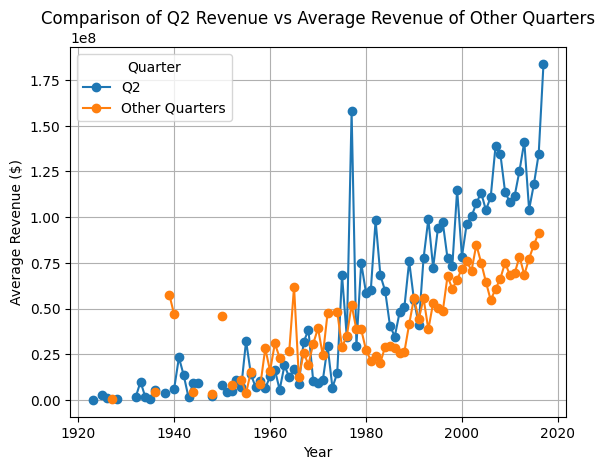

In [87]:
df['quarter'] = df['release_date'].dt.quarter

# กรองข้อมูลจากไตรมาสที่ 1, 2, 3, และ 4
q1_data = df[df['release_date'].dt.month.isin([1, 2, 3])]
q2_data = df[df['release_date'].dt.month.isin([4, 5, 6])]
q3_data = df[df['release_date'].dt.month.isin([7, 8, 9])]
q4_data = df[df['release_date'].dt.month.isin([10, 11, 12])]

# คำนวณค่าเฉลี่ยรายได้ในแต่ละไตรมาส
q1_avg = q1_data.groupby('release_year')['revenue'].mean()
q2_avg = q2_data.groupby('release_year')['revenue'].mean()
q3_avg = q3_data.groupby('release_year')['revenue'].mean()
q4_avg = q4_data.groupby('release_year')['revenue'].mean()

# รวมค่าเฉลี่ยของ Q1, Q3, Q4
other_quarters_avg = (q1_avg + q3_avg + q4_avg) / 3

# สร้าง DataFrame สำหรับการพล็อตกราฟ
quarterly_avg_comparison = pd.DataFrame({
    'Q2': q2_avg,
    'Other Quarters': other_quarters_avg
})

# พล็อตกราฟ
plt.figure(figsize=(10, 5))
quarterly_avg_comparison.plot(kind='line', marker='o')
plt.title('Comparison of Q2 Revenue vs Average Revenue of Other Quarters')
plt.xlabel('Year')
plt.ylabel('Average Revenue ($)')
plt.grid(True)
plt.legend(title='Quarter', loc='upper left')
plt.show()

### 3.14 แสดง % ที่ไตรมาส2ทำรายได้สูงกว่ารายได้เฉลี่ยในไตรมาสอื่นๆ

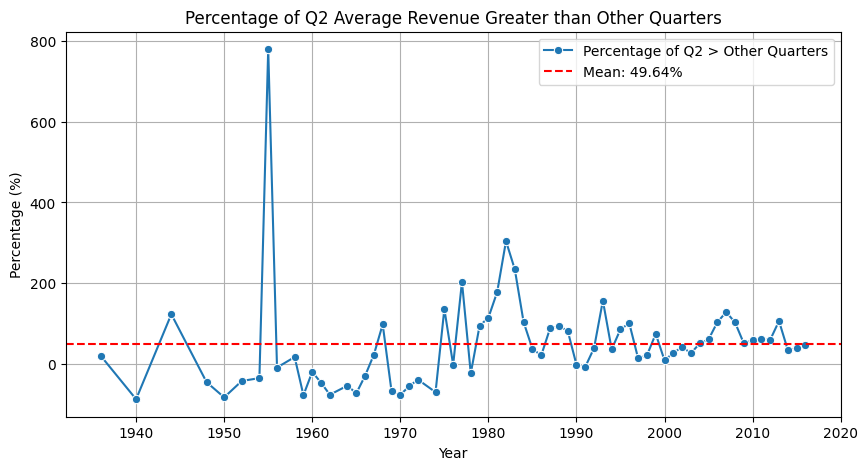

In [88]:
percentage_q2_greater = ((q2_avg - other_quarters_avg) / other_quarters_avg) * 100

# พล็อตกราฟเปอร์เซ็นต์
plt.figure(figsize=(10, 5))
sns.lineplot(x=percentage_q2_greater.index, y=percentage_q2_greater.values, marker='o', label="Percentage of Q2 > Other Quarters")
plt.axhline(percentage_q2_greater.mean(), color='r', linestyle='--', label=f"Mean: {percentage_q2_greater.mean():.2f}%")
plt.xlabel("Year")
plt.ylabel("Percentage (%)")
plt.title("Percentage of Q2 Average Revenue Greater than Other Quarters")
plt.legend()
plt.grid(True)
plt.show()



### 3.15 วิเคราะห์หมวดหมู่ภาพยนต์ที่ทำรายได้สูงสุดในไตรมาสที่ 2

       genres       revenue
2   Animation  3.318316e+08
1   Adventure  2.587722e+08
7      Family  2.337355e+08
8     Fantasy  2.191109e+08
16    Science  2.028259e+08
9     Fiction  2.028259e+08
0      Action  1.809149e+08
17   Thriller  8.725030e+07
3      Comedy  8.582779e+07
14    Mystery  6.951796e+07


C:\Users\sunmodza\AppData\Local\Temp\ipykernel_1760\3484285456.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_revenue_q2.head(10), x='revenue', y='genres', palette='viridis')
c:\Users\sunmodza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\sunmodza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grou

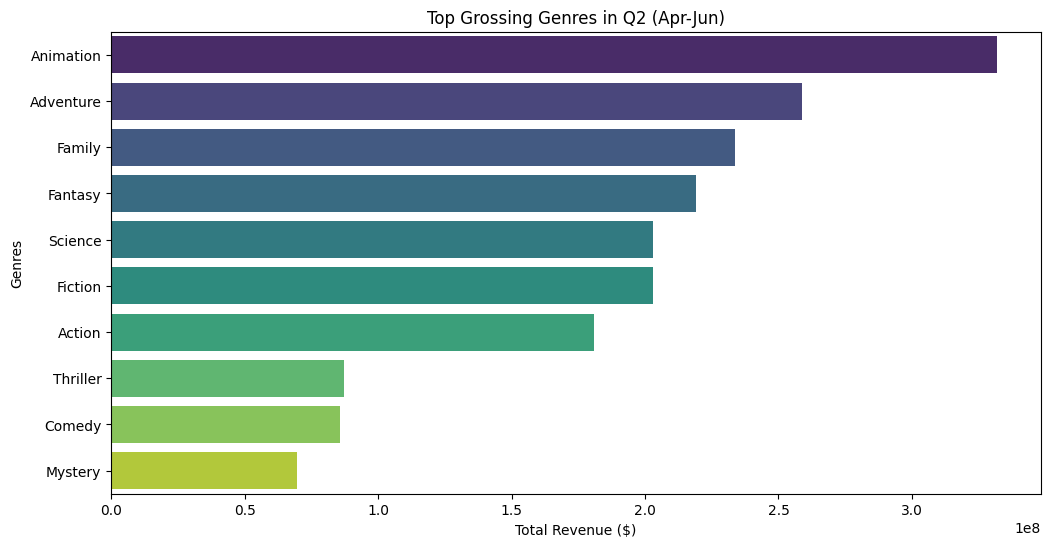

In [89]:
q2=df_genres[(df_genres['release_month']>=4) & (df['release_month']<=6)]
genre_revenue_q2 = q2.groupby('genres')['revenue'].mean().reset_index()

# จัดอันดับแนวหนังที่ทำรายได้สูงสุด
genre_revenue_q2 = genre_revenue_q2.sort_values(by='revenue', ascending=False)

# แสดง 10 อันดับแนวหนังที่ทำรายได้สูงสุดในไตรมาส 2
print(genre_revenue_q2.head(10))

plt.figure(figsize=(12, 6))
sns.barplot(data=genre_revenue_q2.head(10), x='revenue', y='genres', palette='viridis')
plt.title("Top Grossing Genres in Q2 (Apr-Jun)")
plt.xlabel("Total Revenue ($)")
plt.ylabel("Genres")
plt.show()

## 4. Hypothesis testing

สมมติฐาน : รายได้เฉลี่ยของหนังที่ฉายในไตรมาส 2 มีแนวโน้มที่จะทำรายได้เฉลี่ยสูงกว่าของไตรมาสอื่นๆ 49 %

H0(Null Hypothesis): รายได้เฉลี่ยของภาพยนต์ที่ฉายในไตรมาส 2 สูงกว่ารายได้เฉลี่ยของไตรมาสอื่นๆ 49 % เกิดจากความบังเอิญ

H1(Alternative Hypothesis): รายได้เฉลี่ยของหนังที่ฉายในไตรมาส 2 สูงกว่าของไตรมาสอื่นๆ 49 % ไม่ได้เกิดจากความบังเอิญ

### 4.1 วิเคราะห์รายได้เฉลี่ย

In [90]:
mean_q2=df_q2['revenue'].mean()
df_q_other=df.drop(df_q2.index)
mean_other=df_q_other['revenue'].mean()

percentage_increase = (mean_q2 - mean_other) * 100 / mean_other

print(f'รายได้เฉลี่ยของไตรมาสที่ 2 คือ {mean_q2:.2f}')
print(f'รายได้เฉลี่ยของทั้งปีคือ {mean_other:.2f}')


รายได้เฉลี่ยของไตรมาสที่ 2 คือ 94799797.06
รายได้เฉลี่ยของทั้งปีคือ 61146377.61


### 4.2 วิเคราะห์ STD

In [91]:
std_q2=df_q2['revenue'].std()
std_q_other=df_q_other['revenue'].std()
print(f'std ของรายได้ของไตรมาสที่ 2 คือ {std_q2:.2f}')
print(f'std ของรายได้เฉลี่ยของไตรมาสอื่นๆคือ {std_q_other:.2f}')


std ของรายได้ของไตรมาสที่ 2 คือ 193515647.67
std ของรายได้เฉลี่ยของไตรมาสอื่นๆคือ 127927413.00


In [92]:
nq2=len(df_q2)
nqother=len(df_q_other)
print(f'จำนวนข้อมูลของไตรมาสที่ 2 คือ {nq2}')
print(f'จำนวนข้อมูลของไตรมาสอื่นๆคือ {nqother}')


จำนวนข้อมูลของไตรมาสที่ 2 คือ 1733
จำนวนข้อมูลของไตรมาสอื่นๆคือ 5641


### 4.3 ใช้วิธีการ Resample ในการทดสอบสมมติฐาน 
โดยสุ่มตัวอย่างจำนวน 100000 ครั้ง และนำ gA และ gB มาเปรียบเทียบ% ความต่าง

In [93]:
res = []
for _ in range(100000):
    gA = df.sample(len(df_q2['revenue'])).revenue
    gB = df.drop(gA.index).revenue
    res.append((gA.mean()-gB.mean())/gB.mean()*100)

นำมาคำนวณ p_value โดยการหาความน่าจะเป็นที่ gA จะมากกว่า gB 49%

In [94]:
resample_diff=pd.Series(res)
p_value=sum(resample_diff>=49)/len(resample_diff)
p_value

0.0

### 4.4 เปรียบเทียบ p_value กับ alpha

In [95]:
alpha = 0.05  # กำหนดระดับนัยสำคัญที่ 5%
print(f"p_value = {p_value}")
if p_value < alpha:
    print("มีหลักฐานเพียงพอที่จะสรุปว่ารายได้เฉลี่ยของไตรมาส 2 สูงกว่าทั้งปี 49%")
else:
    print("ไม่มีหลักฐานเพียงพอที่จะสรุปว่ารายได้เฉลี่ยของไตรมาส 2 สูงกว่าทั้งปี 49%")


p_value = 0.0
มีหลักฐานเพียงพอที่จะสรุปว่ารายได้เฉลี่ยของไตรมาส 2 สูงกว่าทั้งปี 49%


### 4.5 plot ค่าที่ได้จากการทดสอบโดยใช้วิธี Resample

C:\Users\sunmodza\AppData\Local\Temp\ipykernel_1760\4008656360.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resample_diff)


Text(0.5, 1.0, 'Permutation Test: Revenue Difference Distribution')

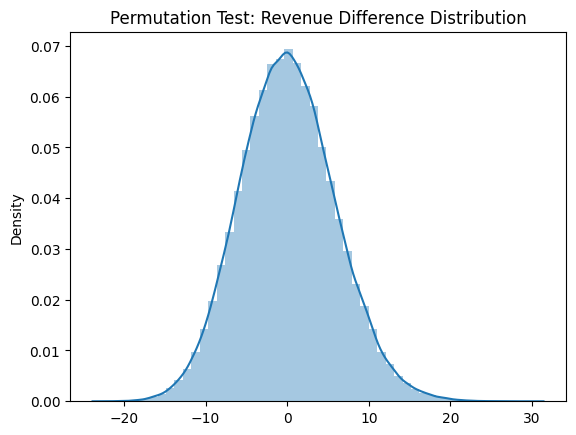

In [96]:
sns.distplot(resample_diff)
plt.title('Permutation Test: Revenue Difference Distribution')

### 4.6 หา Confidence Interval ของรายได้เฉลี่ยไตรมาส 2 และไตรมาสอื่นๆ

In [97]:
l_q2 = []
for _ in range(1000):
    tem = df_q2.sample(1000, replace=True)['revenue'].mean() 
    l_q2.append(tem)

q2_s = pd.Series(l_q2) 
print(f"Confidence Interval สำหรับไตรมาส 2 \n{q2_s.quantile([0.975, 0.025])}")

l_qo = []
for _ in range(1000):
    tem = df_q_other.sample(1000, replace=True)['revenue'].mean() 
    l_qo.append(tem)

qo_s = pd.Series(l_qo) 
print(f"Confidence Interval สำหรับไตรมาสอื่นๆ \n{qo_s.quantile([0.975, 0.025])}")

Confidence Interval สำหรับไตรมาส 2 
0.975    1.069934e+08
0.025    8.338822e+07
dtype: float64
Confidence Interval สำหรับไตรมาสอื่นๆ 
0.975    6.910734e+07
0.025    5.347145e+07
dtype: float64


## 5. สรุปผลการทดสอบสมมติฐาน

สมมติฐาน : รายได้เฉลี่ยของหนังที่ฉายในไตรมาส 2 มีแนวโน้มที่จะทำรายได้เฉลี่ยสูงกว่าของไตรมาสอื่นๆ 49 %

- H0(Null Hypothesis): รายได้เฉลี่ยของภาพยนต์ที่ฉายในไตรมาส 2 สูงกว่ารายได้เฉลี่ยของไตรมาสอื่นๆ 49 % เกิดจากความบังเอิญ

- H1(Alternative Hypothesis): รายได้เฉลี่ยของหนังที่ฉายในไตรมาส 2 สูงกว่าของไตรมาสอื่นๆ 49 % ไม่ได้เกิดจากความบังเอิญ

จากการทดสอบได้ค่า p_value = 0.0 ซึ่งน้อยกว่าค่า alpha ที่ตั้งไว้ที่ 0.05
ดังนั้นจะปฏิเสธ H0 และยอมรับ H1 
สรุปได้ว่า 

**"รายได้เฉลี่ยของภาพยนต์ที่ฉายในไตรมาส 2 สูงกว่ารายได้เฉลี่ยของไตรมาสอื่นๆ 49 %"**


## 6. วิเคราะห์ Insight ที่ได้

**Insight จากการทดสอบ**

**1.รายได้เฉลี่ยของหนังในไตรมาส 2 มีแนวโน้มสูงกว่าชัดเจน**

- ผลการทดสอบทางสถิติแสดงให้เห็นว่ารายได้เฉลี่ยของหนังที่ฉายในไตรมาส 2 สูงกว่าของไตรมาสอื่นๆ อย่างมีนัยสำคัญทางสถิติ (p-value < 0.05)

**2.แนวโน้มนี้ไม่น่าเกิดจากความบังเอิญ**

- การปฏิเสธสมมติฐาน H₀ หมายความว่า มีหลักฐานเชิงสถิติที่สนับสนุนว่าปรากฏการณ์นี้เป็นจริง

- การที่ p-value = 0.0 บ่งบอกว่าโอกาสที่แนวโน้มนี้จะเกิดขึ้นโดยบังเอิญมีน้อยมาก

## 7.การนำผลลัพธ์ไปใช้ประโยชน์
**1.การวางแผนการฉายภาพยนตร์**

- ผู้สร้างหนังสามารถใช้ข้อมูลนี้ในการเลือกช่วงเวลาฉายที่มีโอกาสทำรายได้สูง

- หากต้องการเพิ่มโอกาสทำกำไร อาจวางแผนให้หนังบล็อกบัสเตอร์หรือหนังที่คาดว่าจะได้รับความนิยมสูง ฉายในไตรมาส 2

**2.กลยุทธ์การตลาดและโปรโมชัน**

- โรงภาพยนตร์และแพลตฟอร์มสตรีมมิ่งสามารถใช้แนวโน้มนี้ในการจัดโปรโมชันที่เหมาะสม

- ค่ายหนังสามารถเพิ่มงบโฆษณาในช่วงไตรมาส 2 เพื่อเพิ่มการเข้าถึงกลุ่มเป้าหมาย

**3.การวิเคราะห์ปัจจัยเพิ่มเติม**

- ควรวิเคราะห์ว่าปัจจัยใดมีผลต่อรายได้ที่สูงขึ้นในไตรมาส 2 เช่น วันหยุดยาว, ฤดูกาลท่องเที่ยว

- การศึกษาเพิ่มเติมอาจช่วยให้สามารถนำกลยุทธ์ไปใช้ได้กับไตรมาสอื่นๆ ด้วย